# Análisis Exploratorio de Datos

Es el proceso de conocer detalladamente y darles sentido para ver comportamientos, determinar como tratarlos para la resolución del problema y transformarlos en información útil

## ¿Cómo hacer un buen análisis y por qué?

Es importante que al tener datos se organicen y entiendan las variables, con esto tambien se puede establecer las relaciones entre variables, encontrar patrones, preparar el terreno para escoger el modelo correcto para la necesidad correcta y para lograr tomar decisiones con los antecedentes de los datos que se tengan. Pasos:

- Hacer preguntas que busquen guiar el proceso de exploración

- Determinar el tamaño de los datos, considerando la eliminación de observaciones y variables

- Categorizar las variables, si son numéricas o categóricas, esto con el fin de saber como manejar cada una de ellas

- Limpieza y validación de datos, determinar la proporción de datos faltantes y como tratarlos, ver su distribución y datos atípicos

- Establecer relaciones entre variables, como cambia el analisi si se consideran o no ciertas variables, buscar agrupamientos

## Tipos de analítica de datos:

- Descriptiva: Es el análisis más básico. Permite dar una vista general de las propiedades, dimensiones y comportamiento de un fenómeno desde la descripción de los datos.

- Diagnóstica: Es aplicar criterios para identificar una situación problemática, permite establecer relaciones entre variables y crear hipótesis sobre las causas de un comportamiento.

- Predictiva: Es utilizar los datos para explicar un posible comporta miento de las variables de interés si se siguen las tendencias actuales o si se cambian. Permite determinar el riesgo a futuro.

- Prescriptiva: Utilizar los datos para la toma de decisiones con base a eventos pasados. Porpone soluciones basadas en evidencia.

## Tipos de datos

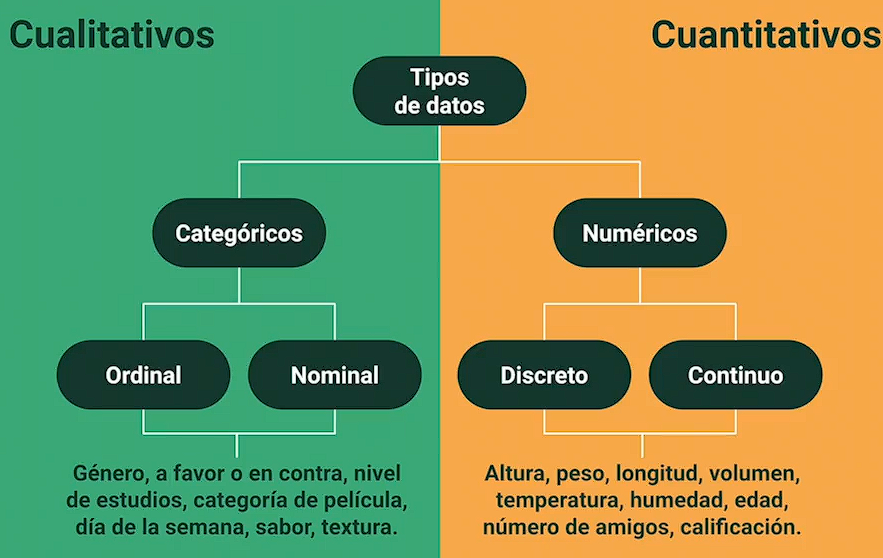

- Cualitativas
    
    - Nominales: Son las que se les asigna una cualidad. Por ejemplo un color.

    - Ordinales: Que tienen un orden. Por ejemplo: alto, medio, bajo.

    - Binarias: Representan estados, que toman dos valores. Por ejemplo: Existe, género.

- Cuantitativas 

    - Discretas: Son finitas y toman ciertos valores, pueden verse como variables separadas por un "paso". Por ejemplo, una persona puede tener 1,  2 o 3 amigos, nuna 3.5.

    - Continuas: Pueden verse como infinitos dentro de los reales en un rango establecido. Por ejemplo, la estatura.

## Tipos de análisis

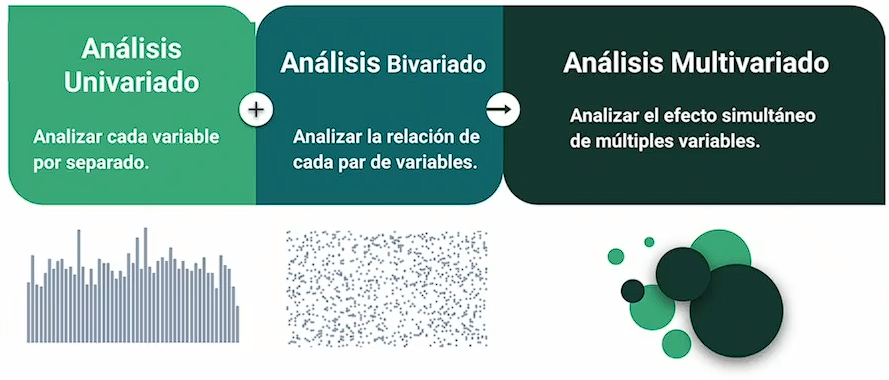

- Univariado: Busca analizar cada variable de forma independiente, entendiendo sus caracteristicas, definiciones y propiedades.

- Bivariado: Analiza las relaciones entre cada par de variables.

- Multivariado: Es el efecto simultáneo de múltiples variables, es el análisis más usado puesto que permite dar una visión general del problema.

## Proyecto pingüinos

In [102]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [103]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import sklearn.metrics as metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

In [104]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

### Conociendo los datos

Datos crudos

In [105]:
raw_penguins_df = palmerpenguins.load_penguins_raw()
raw_penguins_df.head()

studyName  Sample Number                              Species  Region  \
0   PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1   PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2   PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3   PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4   PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   

      Island               Stage Individual ID Clutch Completion    Date Egg  \
0  Torgersen  Adult, 1 Egg Stage          N1A1               Yes  2007-11-11   
1  Torgersen  Adult, 1 Egg Stage          N1A2               Yes  2007-11-11   
2  Torgersen  Adult, 1 Egg Stage          N2A1               Yes  2007-11-16   
3  Torgersen  Adult, 1 Egg Stage          N2A2               Yes  2007-11-16   
4  Torgersen  Adult, 1 Egg Stage          N3A1               Yes  2007-11-16   

   Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \
0                39.1               18.7                181.0         3750.0   
1                39.5               17.4                186.0         3800.0   
2                40.3               18.0                195.0         3250.0   
3                 NaN                NaN                  NaN            NaN   
4                36.7               19.3                193.0         3450.0   

      Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0    MALE                NaN                NaN   
1  FEMALE            8.94956          -24.69454   
2  FEMALE            8.36821          -25.33302   
3     NaN                NaN                NaN   
4  FEMALE            8.76651          -25.32426   

                         Comments  
0  Not enough blood for isotopes.  
1                             NaN  
2                             NaN  
3              Adult not sampled.  
4                             NaN

Datos preprocesados

In [106]:
preprocess_penguins_df = palmerpenguins.load_penguins()
preprocess_penguins_df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007

Usando seaborn

In [107]:
sns.load_dataset("penguins").head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

### Recolección de datos, limpieza y validación

La recolección de datos es la forma de recolectar información que permite obtener conocimiento de primera mano e ideas originales sobre el problema de investigación

**Tipos de Recolección de Datos**

- Primaria: Datos colectados de primera mano a traves de encuestas, entrevistas, experimentos y otros. Puedes decidir que recolectas y que quiere medir. Tienes total control de los datos.

- Secundaria: Datos previamente recolectados por una fuente primaria externa al usuario primario. Son datos abiertos que puedes utilizar. No tienes control sobre lo que se mide o sobre el objetivo del estudio

- Terciaria: Datos que se adquieren de fuentes completamente externas al usuario primario. Son datos accesibles a todo el mundo por lo que pierde su valor y tienden a ser datos genericos

**Validación de los datos**

Es el proceso de asegurar la consistencia y precisión dentro de un conjunto de datos. Para asegurar la consistencia de los datos debemos validar:

* Modelo de datos: si un tercero recolecto los datos, verifica que preguntas queria responder con los datos. Si eres quien recolecta los datos, hazte muchas preguntas y considera si esos datos son suficientes para responderlas

* Seguimiento de formato estándar de archivos: verifica que la extensión de los archivos que estas manejando correspondan con el formato interno que tienen. Asegurate que los numeros se expresen en el formato que estas trabajando.

* Tipos de Datos: verifica que los datos sen del tipo que se indica en el dataset

* Rango de variables: verifica que las variables estén dentro del rango establecido en la recoleccion de datos. En caso de encontrar variables fuera del rango preguntate: como llegaron esos datos aqui? tienen algun significado alterno? debo preservarlos o eliminarlos?

* Unicidad: verifica que tan unicos son los datos. detecta si existe duplicidad en los datos y corrige.

* Consistencia de expresiones: se refiere a como la persona que recolecta los datos define sus variables. Formato de fecha, de hora, variables escritas de la misma forma en toda la tabla. No son datos erroneos, solo es cuestion de darle el formato adecuado

* Valores nulos: pueden estar explicitos o implicitos en el dataset. Son datos faltantes. Porque esta vacio? puedo rellenarlo con otro dato? esta vacio por un proceso aleatorio o tiene un sentido?

#### Validación

Tipos de dato de las variables

In [108]:
preprocess_penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

Cantidad de variables de cada tipo

In [109]:
preprocess_penguins_df.dtypes.value_counts()

float64    4
object     3
int64      1
dtype: int64

Cantidad observaciones (rows) y de variables (columns)

In [110]:
preprocess_penguins_df.shape

(344, 8)

##### Valores nulos

¿Existen valores nulos?

In [111]:
preprocess_penguins_df.isnull().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

Cantidad de valores nulos en cada columna

In [112]:
preprocess_penguins_df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

Cantidad de valores nulos en todo el df

In [113]:
preprocess_penguins_df.isnull().sum().sum()

19

Proporción de valores nulos

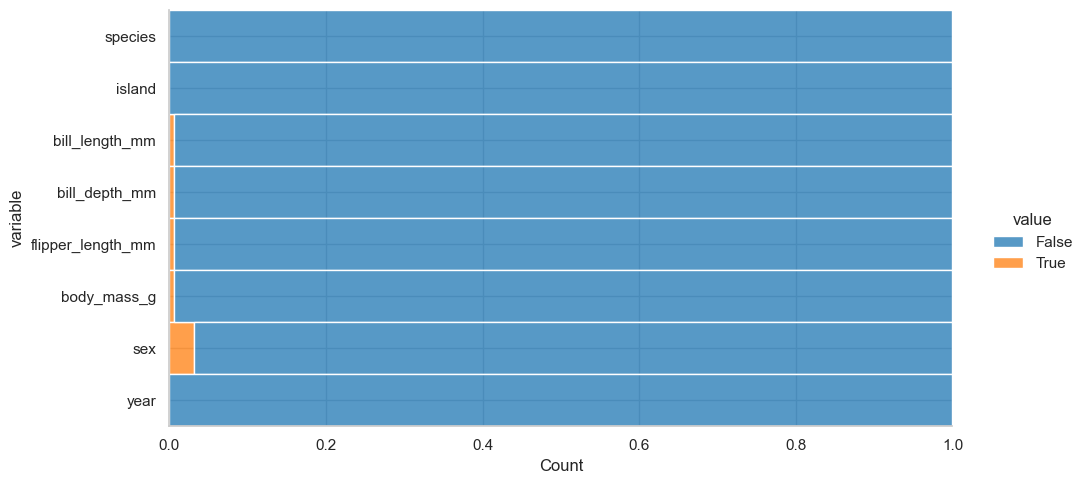

In [114]:
preprocess_penguins_df.isnull().melt().pipe(
    lambda df: sns.displot(df,y="variable", hue="value", multiple="fill", aspect=2)
)
# sns.displot(preprocess_penguins_df.isnull().melt(),y="variable", hue="value", multiple="fill", aspect=2)

Visualizar valores nulos

<AxesSubplot: >

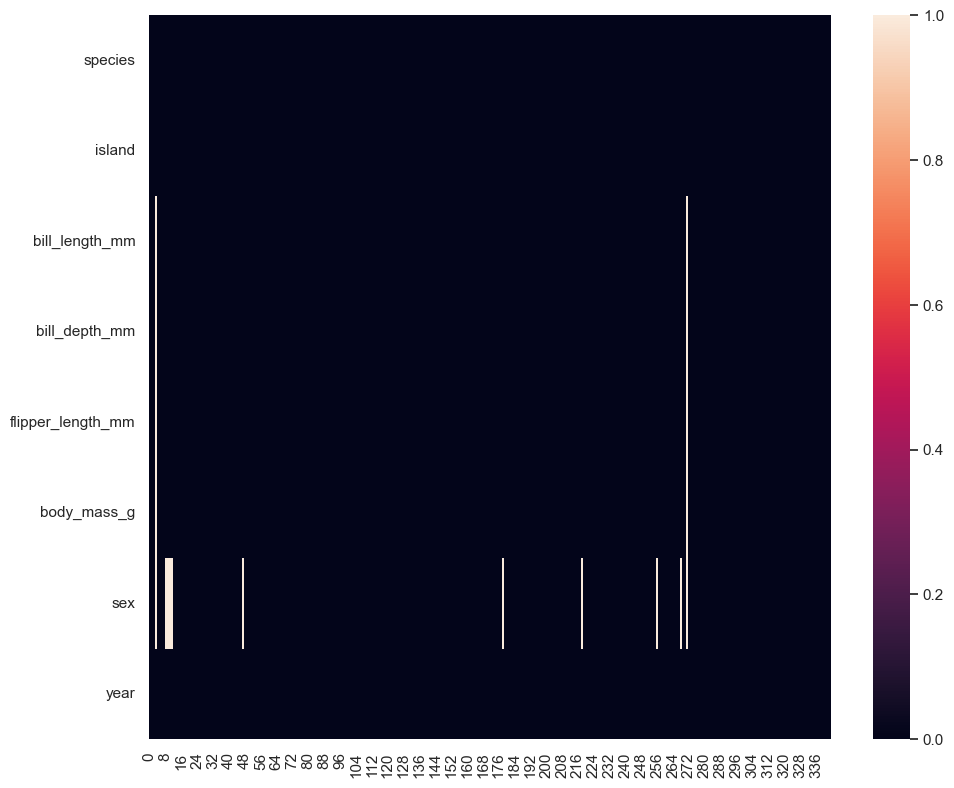

In [115]:
sns.heatmap(preprocess_penguins_df.isnull().transpose())

Eliminar valores nulos

In [116]:
processed_penguins_df = preprocess_penguins_df.dropna()
processed_penguins_df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

### Explorando una variable categórica

In [117]:
processed_penguins_df.describe(include=[object, bool])

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       146     163   168

In [118]:
categorical_cols = processed_penguins_df.select_dtypes(["object", "bool"]).columns
categorical_cols

Index(['species', 'island', 'sex'], dtype='object')

In [119]:
len(categorical_cols)

3

In [120]:
for i in range(3):
    print(i)

0
1
2


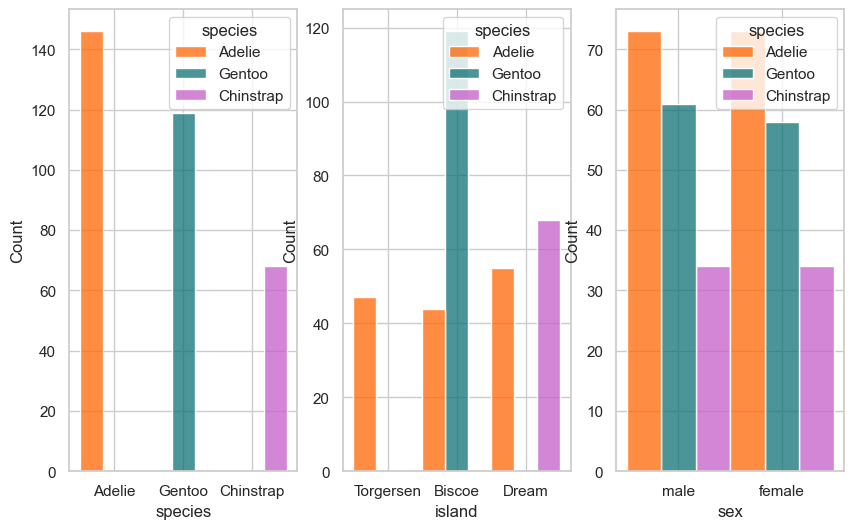

In [121]:
fig, ax = plt.subplots(1, len(categorical_cols), figsize=(10, 6))

for i in range(categorical_cols.value_counts().sum()):
    (
        processed_penguins_df
        .pipe(
            lambda df:
                sns.histplot(
                    ax=ax[i],
                    data=df,
                    x=categorical_cols[i],
                    palette=penguin_color,
                    hue="species",
                    multiple="dodge"
                )
            )
    )
plt.show()

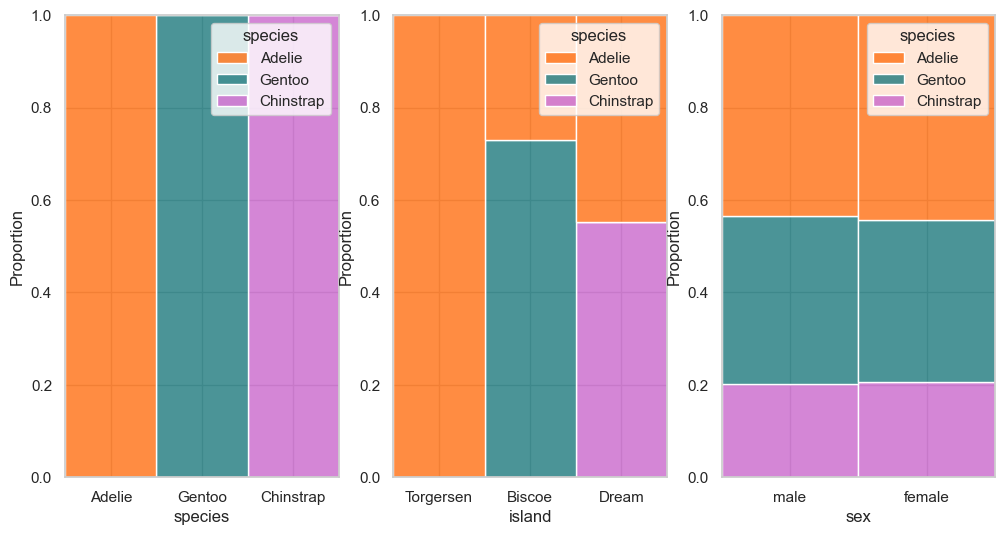

In [122]:
fig, ax = plt.subplots(1, len(categorical_cols), figsize=(12, 6))
for i in range(len(categorical_cols)):
    (
        processed_penguins_df
        .pipe(
            lambda df:
                sns.histplot(
                    ax=ax[i],
                    data=df,
                    x=categorical_cols[i],
                    palette=penguin_color,
                    hue="species",
                    multiple="fill",
                    stat="proportion"
                )
            )
    )
plt.show()

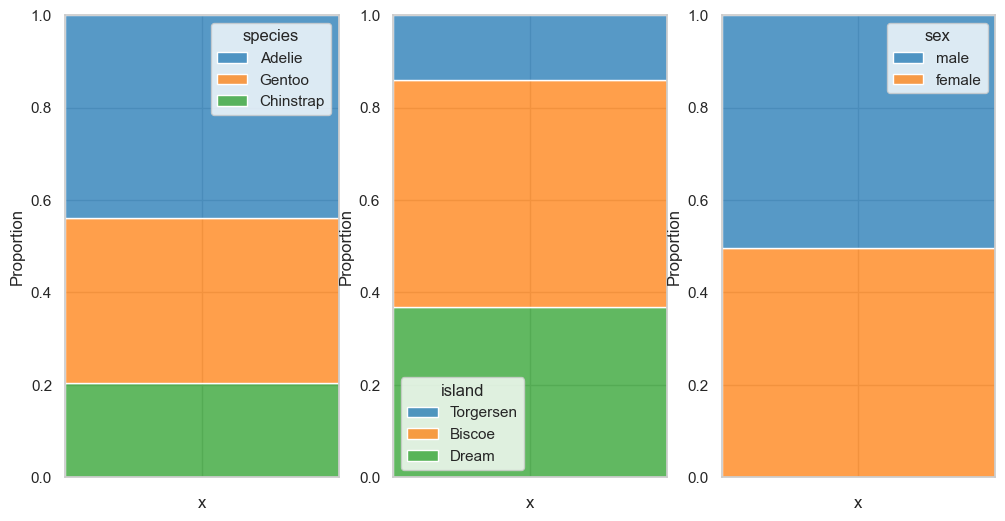

In [123]:
fig, ax = plt.subplots(1, len(categorical_cols), figsize=(12, 6))
for i in range(len(categorical_cols)):
    (
        processed_penguins_df.
        assign(x="")
        .pipe(
            lambda df:
                sns.histplot(
                    ax=ax[i],
                    data=df,
                    x="x",
                    hue=categorical_cols[i],
                    multiple="fill",
                    stat="proportion"
                )
            )
    )
plt.show()

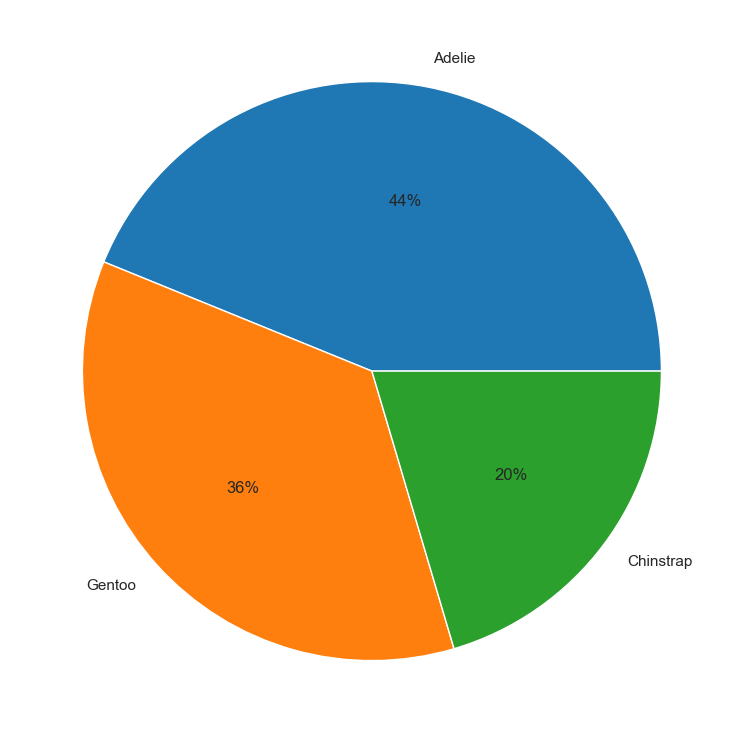

In [124]:
plt.pie(processed_penguins_df["species"].value_counts(),
        labels=processed_penguins_df["species"].value_counts().index,
        autopct='%.0f%%')
plt.show()

### [Medidas de tendencia central](5.%20Probabilidad.ipynb)

In [125]:
preprocess_penguins_df.describe()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      342.000000     342.000000         342.000000   342.000000   
mean        43.921930      17.151170         200.915205  4201.754386   
std          5.459584       1.974793          14.061714   801.954536   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.225000      15.600000         190.000000  3550.000000   
50%         44.450000      17.300000         197.000000  4050.000000   
75%         48.500000      18.700000         213.000000  4750.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   344.000000  
mean   2008.029070  
std       0.818356  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000

#### Media

In [126]:
preprocess_penguins_df.mean(numeric_only=True)

bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
year                 2008.029070
dtype: float64

#### Mediana

In [127]:
preprocess_penguins_df.median(numeric_only=True)

bill_length_mm         44.45
bill_depth_mm          17.30
flipper_length_mm     197.00
body_mass_g          4050.00
year                 2008.00
dtype: float64

#### Moda

In [128]:
preprocess_penguins_df.mode()

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Biscoe            41.1           17.0              190.0   

   body_mass_g   sex  year  
0       3800.0  male  2009

### Medidas de dispersión

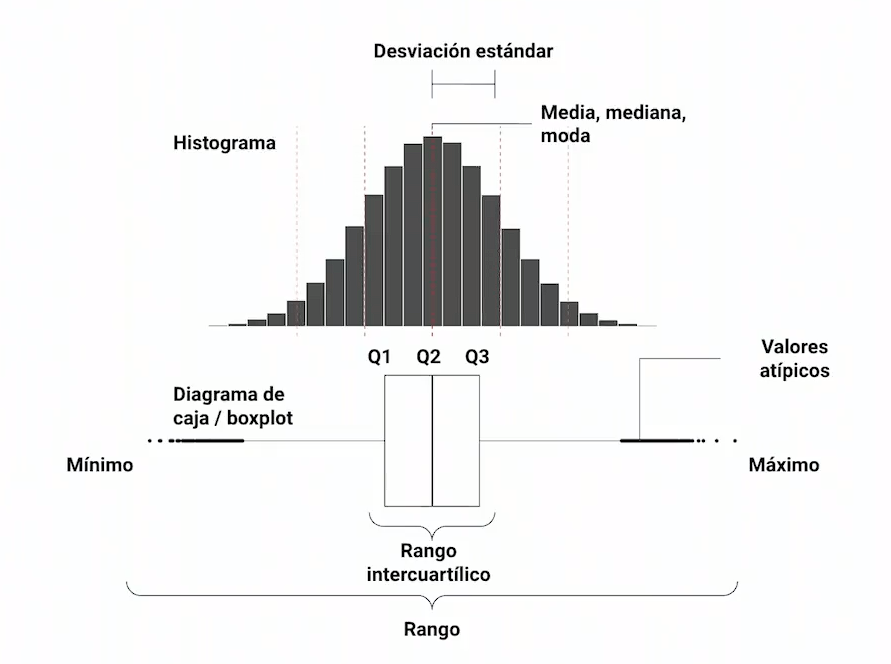

#### Rango

La diferencia entre el valor máximo y el mínimo

In [129]:
processed_penguins_df.max(numeric_only=True) - processed_penguins_df.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

#### Rango intercuartílico

Comprenden +-25% de los datos respecto a la mediana

In [130]:
processed_penguins_df.quantile(0.25, numeric_only=True) 

bill_length_mm         39.5
bill_depth_mm          15.6
flipper_length_mm     190.0
body_mass_g          3550.0
year                 2007.0
Name: 0.25, dtype: float64

In [131]:
processed_penguins_df.quantile(0.75, numeric_only=True) 

bill_length_mm         48.6
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4775.0
year                 2009.0
Name: 0.75, dtype: float64

In [132]:
(
    processed_penguins_df
    .quantile(q=[0.25,0.50,0.75], numeric_only=True)
    .transpose()
    .assign(iqr=lambda df: df[0.75] - df[0.25])
)

0.25     0.5    0.75     iqr
bill_length_mm       39.5    44.5    48.6     9.1
bill_depth_mm        15.6    17.3    18.7     3.1
flipper_length_mm   190.0   197.0   213.0    23.0
body_mass_g        3550.0  4050.0  4775.0  1225.0
year               2007.0  2008.0  2009.0     2.0

<AxesSubplot: xlabel='species', ylabel='bill_length_mm'>

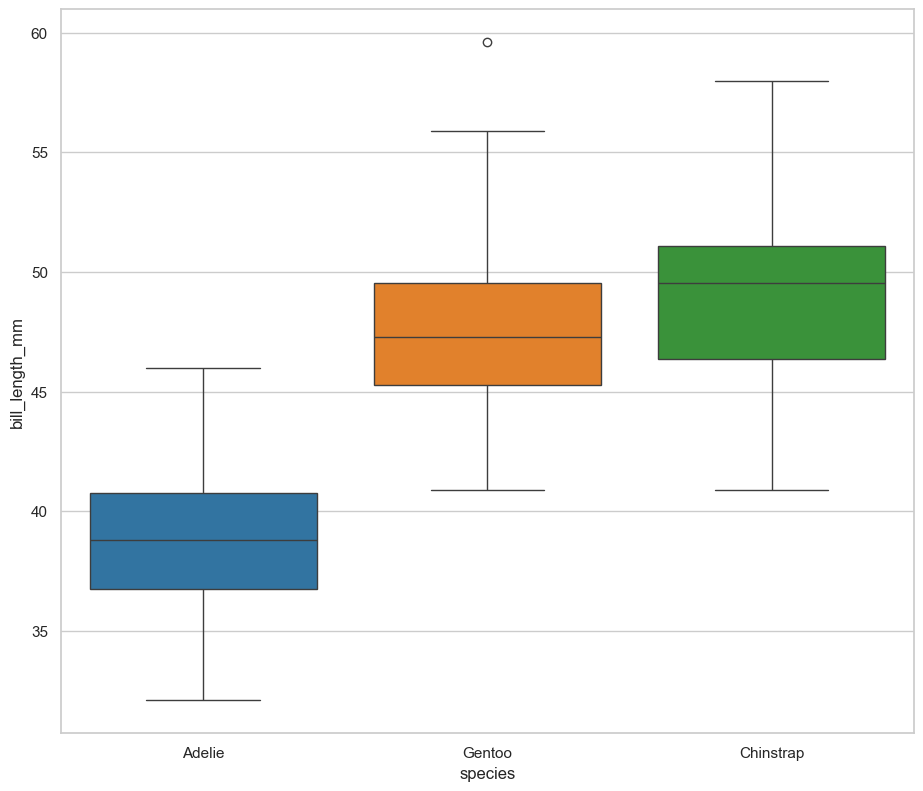

In [133]:
sns.boxplot(
    preprocess_penguins_df,
    y="bill_length_mm",
    x="species",
    hue="species"
)

#### Desviación estándar

Habla de la dispersión de los datos, comprende un 65% de los datos

In [134]:
processed_penguins_df.std(numeric_only=True)

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

In [135]:
# Limite inferior del intervalo de confianza 65% suponiendo una distribución normal
processed_penguins_df.mean(numeric_only=True) - processed_penguins_df.std(numeric_only=True)

bill_length_mm         38.524124
bill_depth_mm          15.195629
flipper_length_mm     186.951202
body_mass_g          3401.841255
year                 2007.229098
dtype: float64

In [136]:
# Limite superior del intervalo de confianza 65% suponiendo una distribución normal
processed_penguins_df.mean(numeric_only=True) + processed_penguins_df.std(numeric_only=True)

bill_length_mm         49.461461
bill_depth_mm          19.134100
flipper_length_mm     214.982732
body_mass_g          5012.272859
year                 2008.854986
dtype: float64

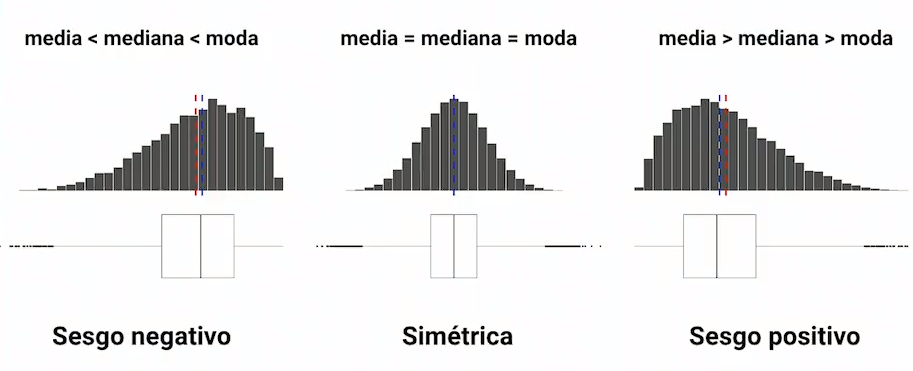

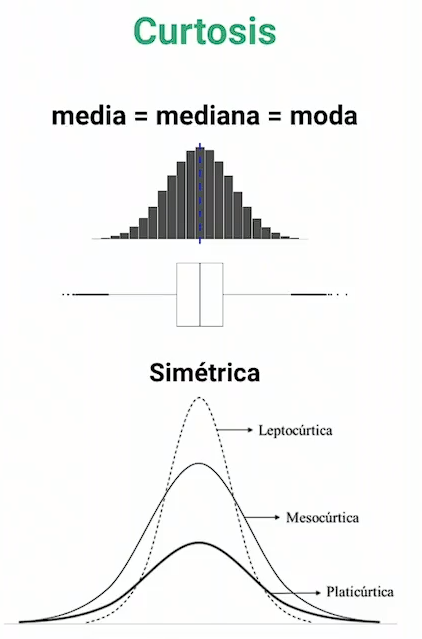 

Una curtosis mayor a 0 indica que la mayoria de los datos estan muy concentrados alrededor de la media, lo cual indica que hay poca variabilidad en los datos, es decir, el rango es pequeño

Una curtosis negativa indica lo contrario, los datos estan alejados de la media, lo cual indica mucha variabilidad en los datos, su rango es amplio

#### Visualización de la distribución

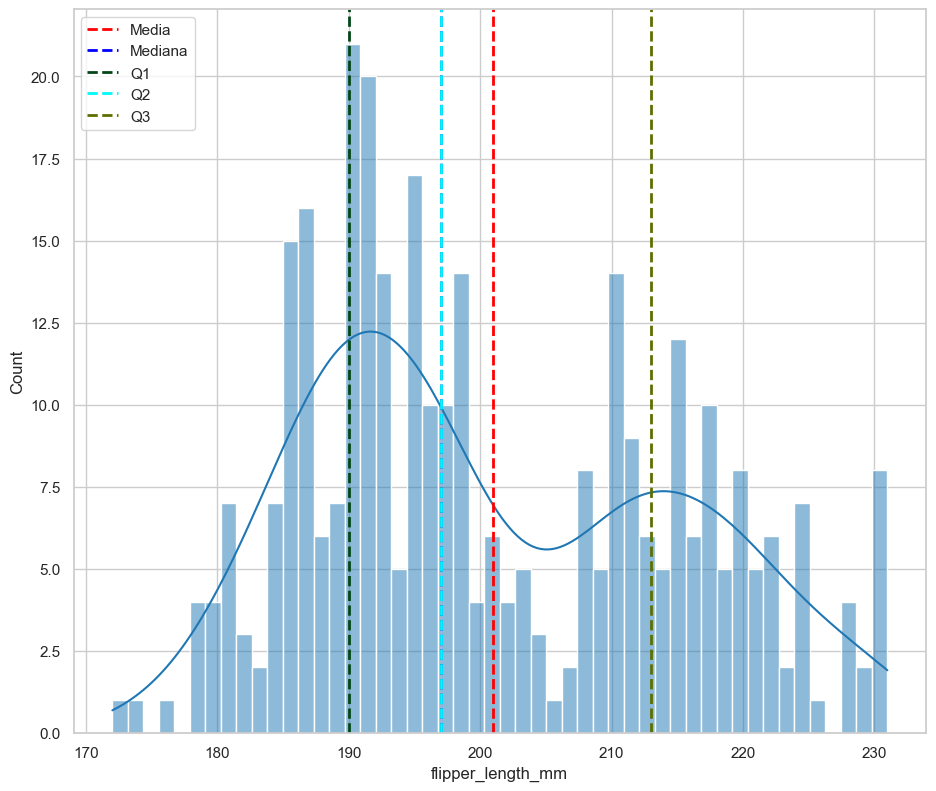

In [137]:
sns.histplot(
    data=processed_penguins_df,
    x="flipper_length_mm",
    bins=50,
    kde=True
)
plt.axvline(
    x=processed_penguins_df["flipper_length_mm"].mean(),
    color="red",
    linestyle="dashed",
    linewidth=2,
    label="Media"
)
plt.axvline(
    x=processed_penguins_df["flipper_length_mm"].median(),
    color="b",
    linestyle="dashed",
    linewidth=2,
    label="Mediana"
)
plt.axvline(
    x=processed_penguins_df["flipper_length_mm"].quantile(0.25),
    color="#024617",
    linestyle="dashed",
    linewidth=2,
    label="Q1"
)
plt.axvline(
    x=processed_penguins_df["flipper_length_mm"].quantile(0.50),
    color="#00FAFA",
    linestyle="dashed",
    linewidth=2,
    label="Q2"
)
plt.axvline(
    x=processed_penguins_df["flipper_length_mm"].quantile(0.75),
    color="#5C7002",
    linestyle="dashed",
    linewidth=2,
    label="Q3"
)
plt.legend(loc="upper left")
plt.show()

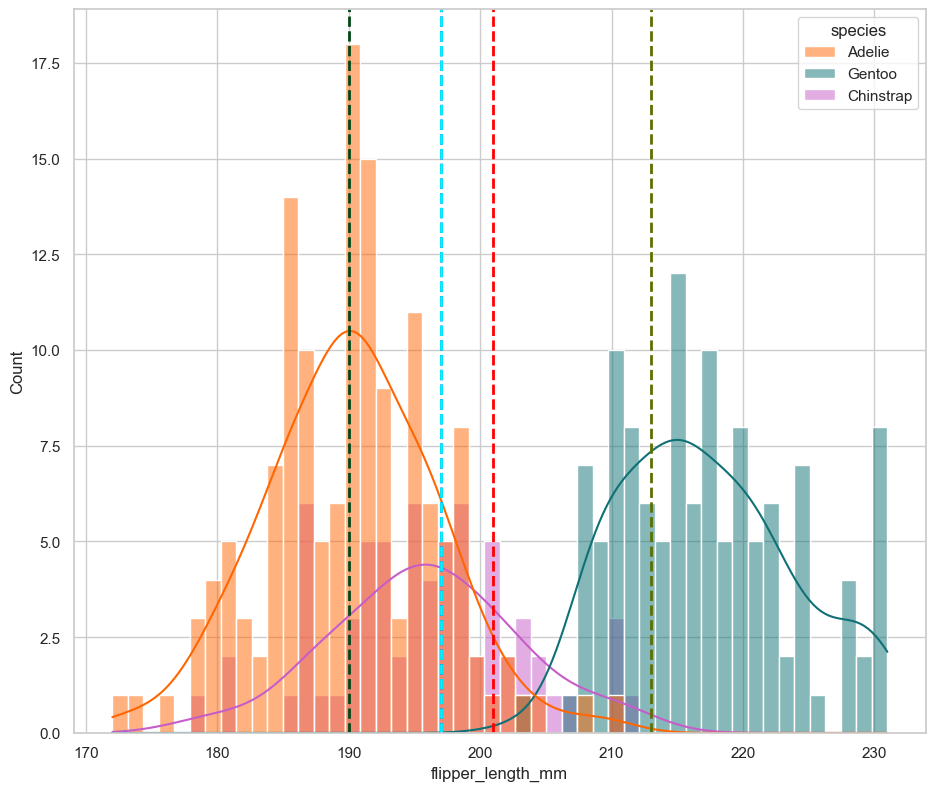

In [138]:
sns.histplot(
    data=processed_penguins_df,
    x="flipper_length_mm",
    bins=50,
    hue="species",
    palette=penguin_color,
    # alpha=0.6,
    kde=True
)
plt.axvline(
    x=processed_penguins_df["flipper_length_mm"].mean(),
    color="red",
    linestyle="dashed",
    linewidth=2,
    label="Media"
)
# Q_75(Blue)
plt.axvline(
    x=processed_penguins_df["flipper_length_mm"].median(),
    color="b",
    linestyle="dashed",
    linewidth=2,
    label="Mediana"
)
plt.axvline(
    x=processed_penguins_df["flipper_length_mm"].quantile(0.25),
    color="#024617",
    linestyle="dashed",
    linewidth=2,
    label="Q1"
)
plt.axvline(
    x=processed_penguins_df["flipper_length_mm"].quantile(0.50),
    color="#00FAFA",
    linestyle="dashed",
    linewidth=2,
    label="Q2"
)
plt.axvline(
    x=processed_penguins_df["flipper_length_mm"].quantile(0.75),
    color="#5C7002",
    linestyle="dashed",
    linewidth=2,
    label="Q3"
)
# plt.legend(loc="upper left")
plt.show()

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'year'],
      dtype='object')


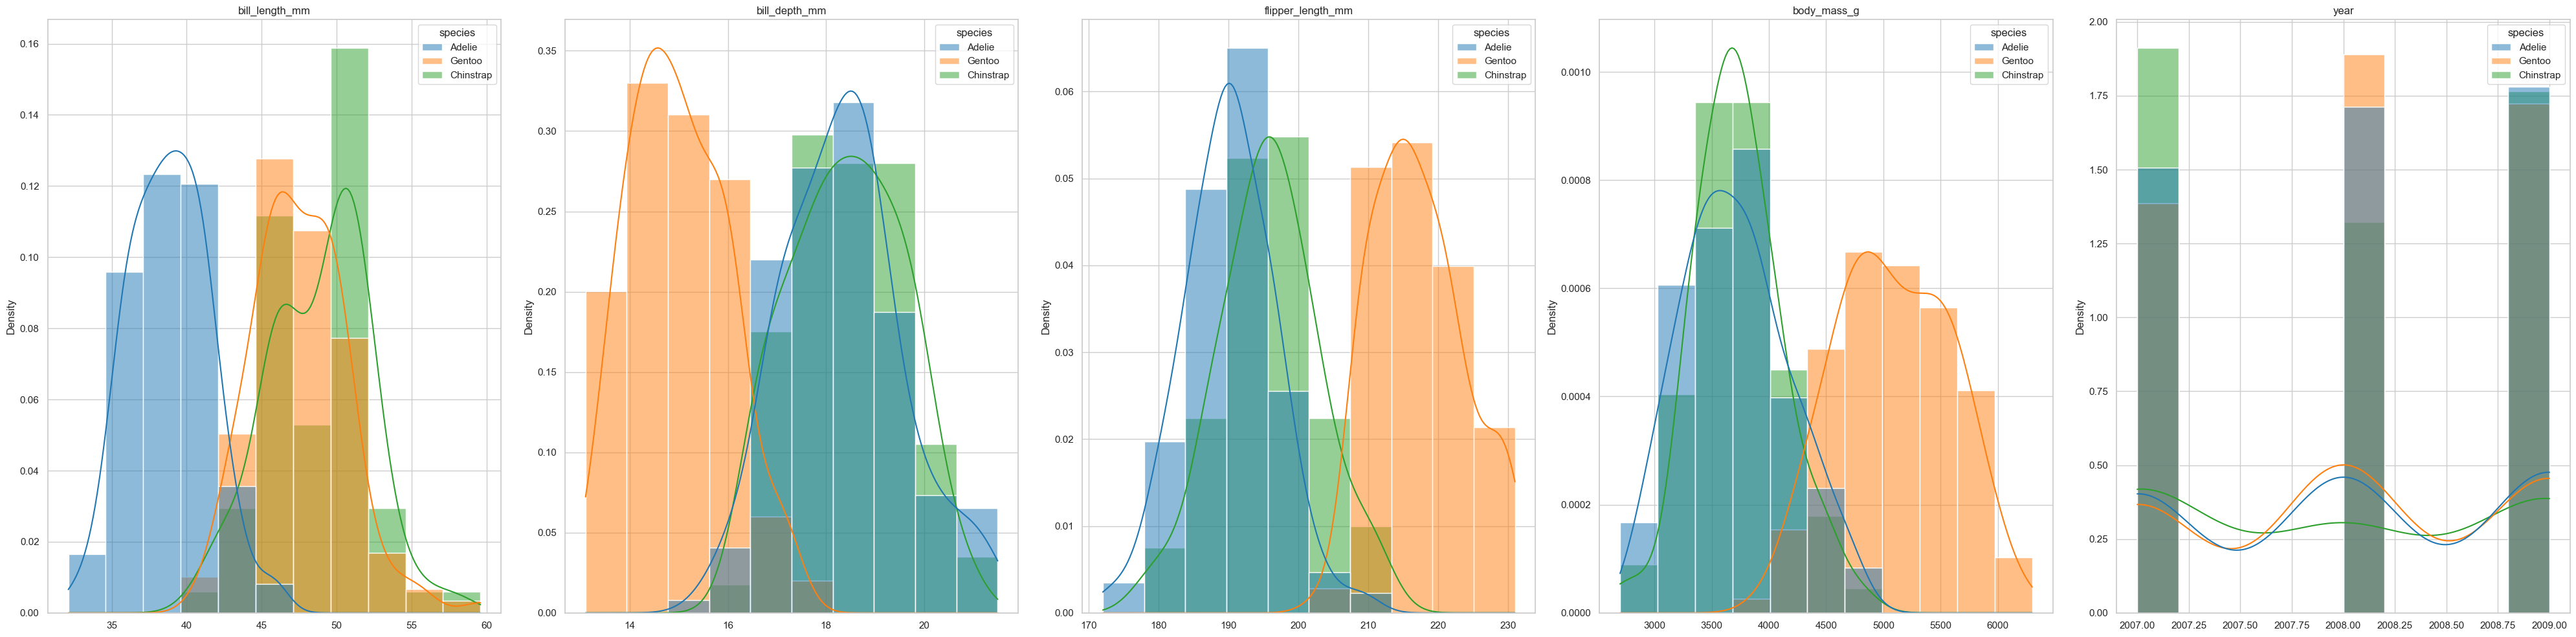

In [139]:
numeric_columns = processed_penguins_df.select_dtypes(include=np.number).columns
print(numeric_columns)
fig, ax = plt.subplots(1, len(numeric_columns), figsize=(40,10))

for i, col in enumerate(numeric_columns):
    sns.histplot(
        data=processed_penguins_df,
        ax=ax[i],
        x=col,
        hue="species",
        # binwidth=1,
        bins="auto",
        kde=True,
        alpha=.5,
        # element="step",
        common_norm=False,
        stat="density",
    )
    
    ax[i].set_title(col)
    ax[i].set_xlabel(None)
    ax[i].set_ylabel("Density")

plt.tight_layout()

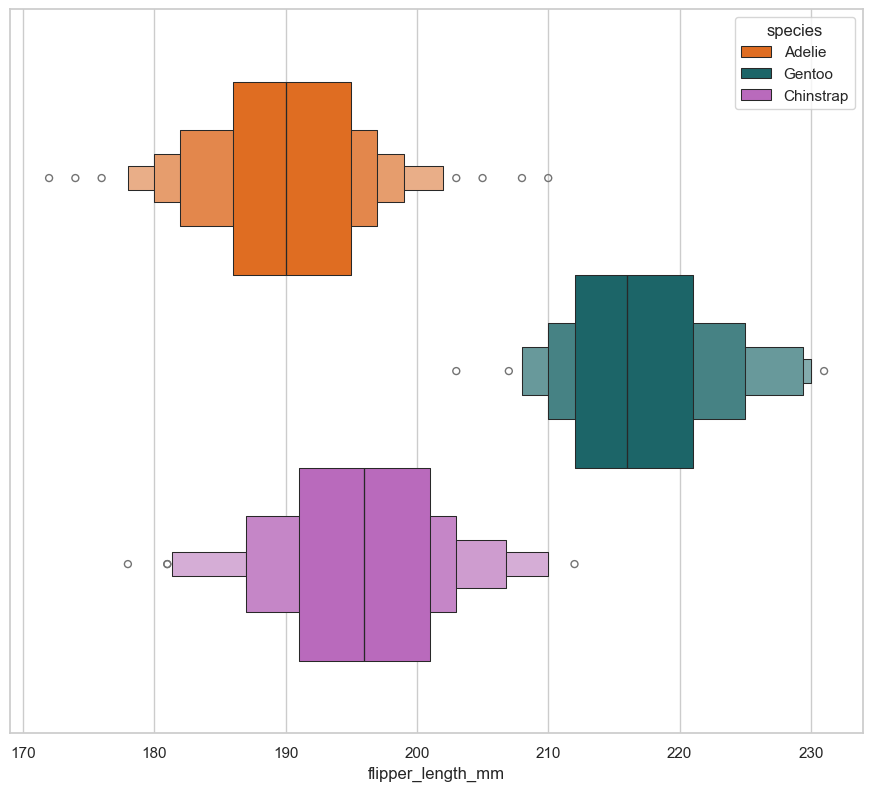

In [140]:
sns.boxenplot(
    data=preprocess_penguins_df,
    x="flipper_length_mm",
    hue="species",
    palette=penguin_color,
    k_depth=4
)
plt.show()

##### Función de probabilidad de masas (PMF)

Nos da la probabilidad de que una variable aleatoria discreta tome un valor determinado.

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Probability'>

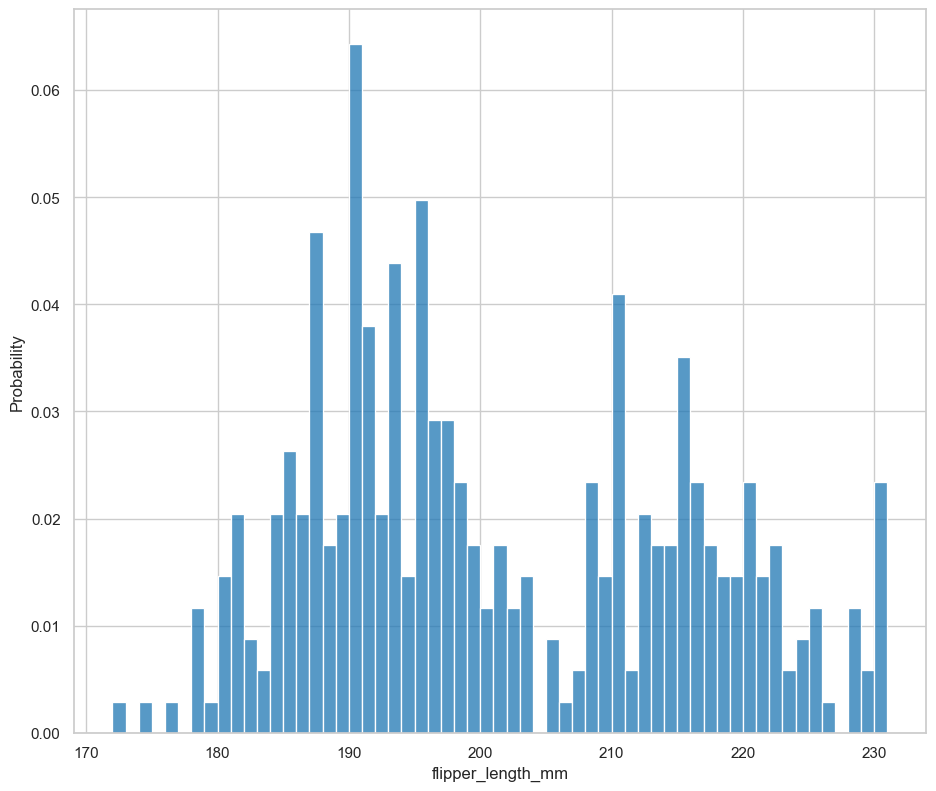

In [141]:
sns.histplot(
    data=preprocess_penguins_df,
    x="flipper_length_mm",
    binwidth=1,
    stat="probability"
)

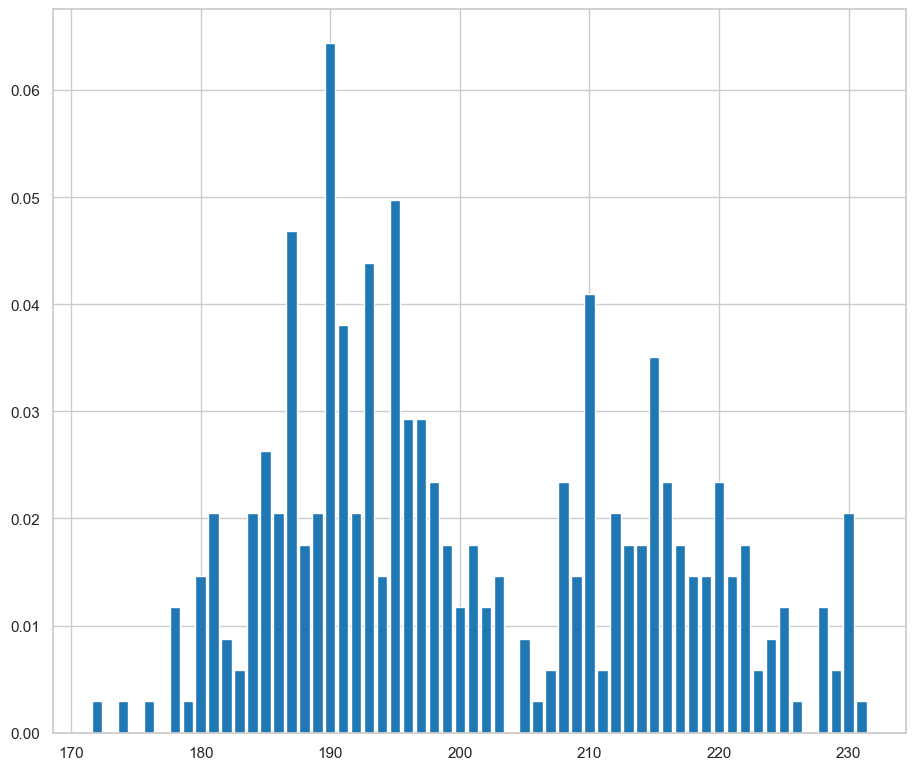

In [142]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(
    preprocess_penguins_df["flipper_length_mm"],
    normalize=True # Si se pone en falso retorna las frecuencias
)
pmf_flipper_length_mm.bar()

In [143]:
pmf_flipper_length_mm(230)

0.02046783625730994

In [144]:
pmf_flipper_length_mm.max()

0.06432748538011696

##### Función de distribución acumulada (CDF)

Nos da la probabilidad de que una variable aleatoria sea menor o igual a un valor determinado

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

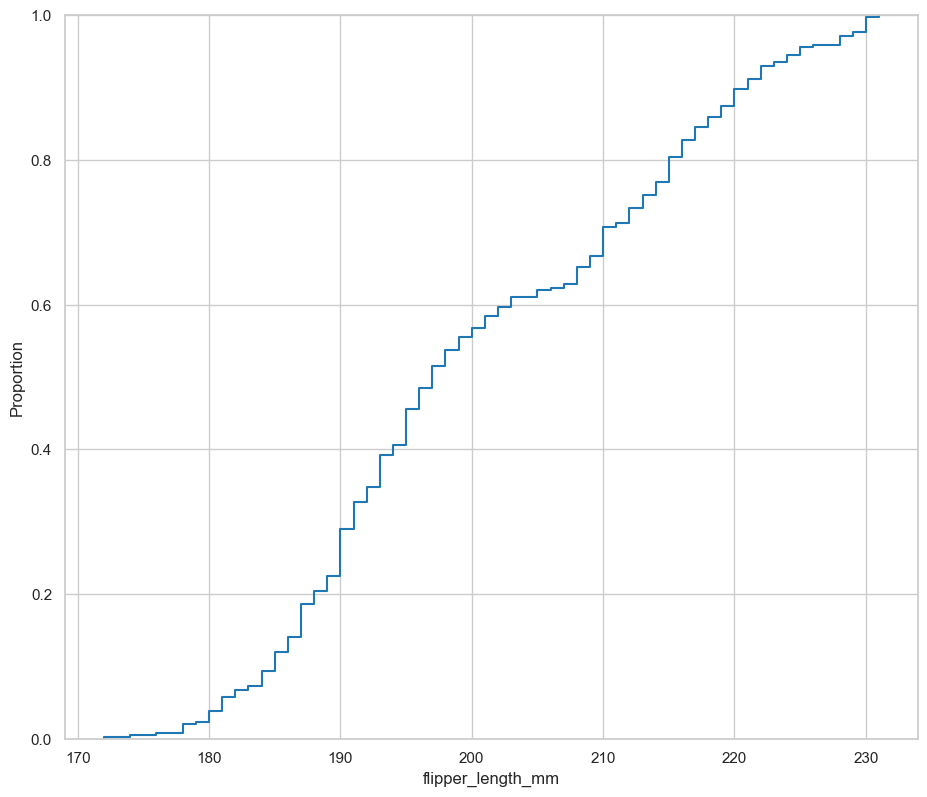

In [145]:
sns.ecdfplot(
    data=preprocess_penguins_df,
    x="flipper_length_mm"
)

In [146]:
cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(
    processed_penguins_df["flipper_length_mm"]
)

<AxesSubplot: >

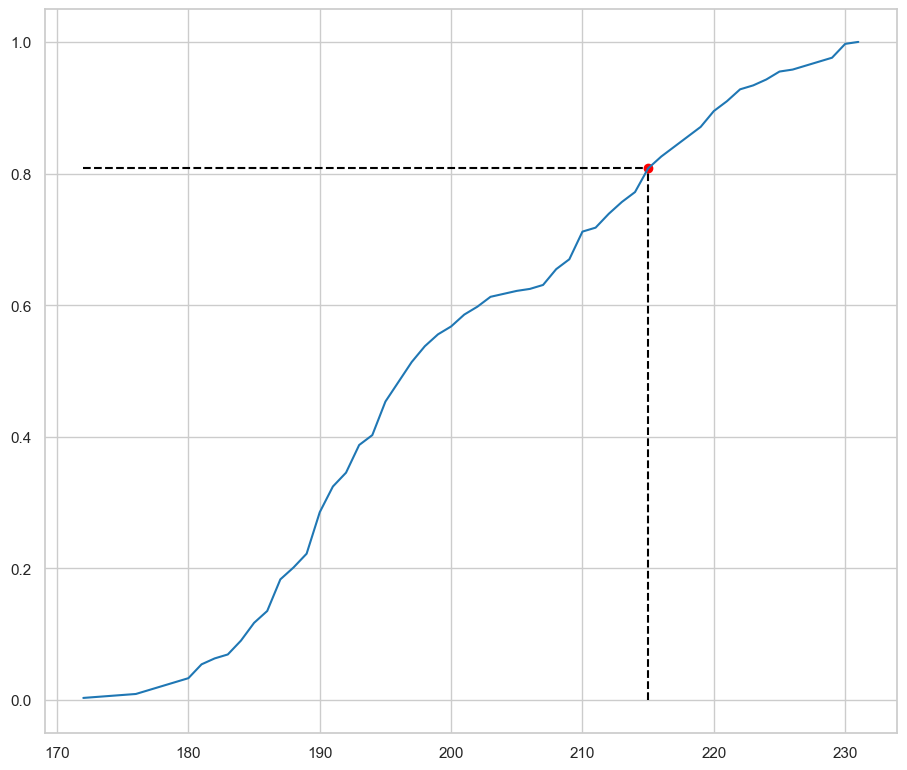

In [147]:
q = 215
p = cdf_flipper_length_mm.forward(q)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color='black',
    linestyle='dashed'
)

plt.hlines(
    y=p,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)

plt.plot(q, p, 'ro')
cdf_flipper_length_mm.plot()

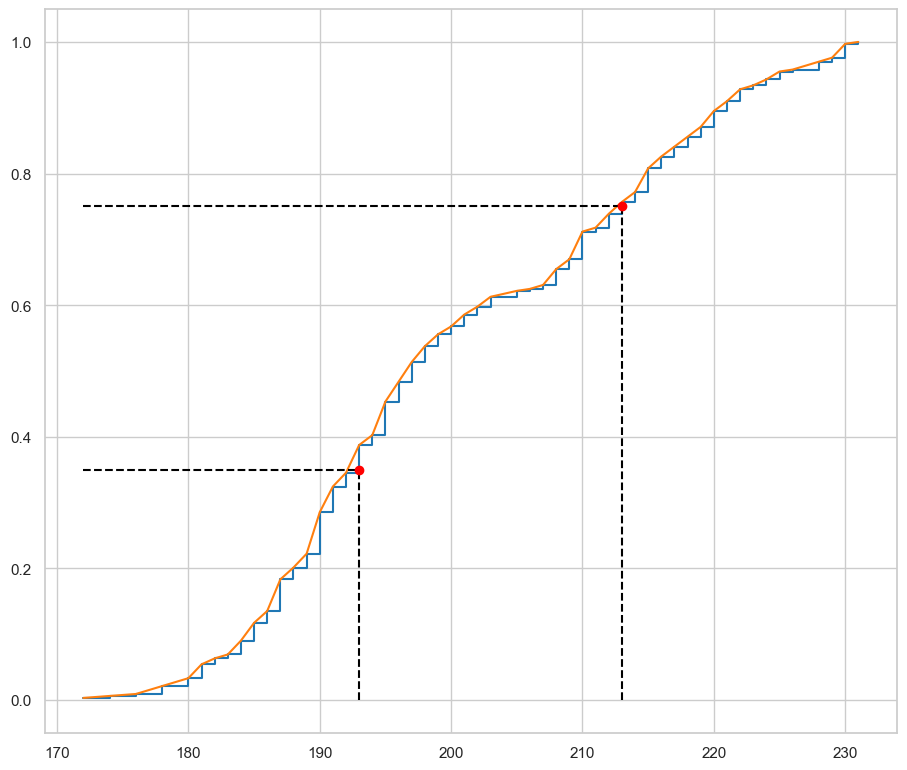

In [148]:
cdf_flipper_length_mm.step()
cdf_flipper_length_mm.plot()

p_1 = 8.25 # Specify probability
p_2 = 8.75
ps = ( 0.35 , 0.75 ) # IQR
qs = cdf_flipper_length_mm.inverse(ps)
plt.vlines (
    x = qs,
    ymin = 0,
    ymax=ps,
    color='black',
    linestyle='dashed'
)

plt.hlines(
   y=ps,
   xmin=pmf_flipper_length_mm.qs[0],
   xmax=qs,
   color='black',
   linestyle='dashed'
)

plt.scatter(
   x=qs,
   y=ps,
   color='red',
   zorder=2
)
plt.show()

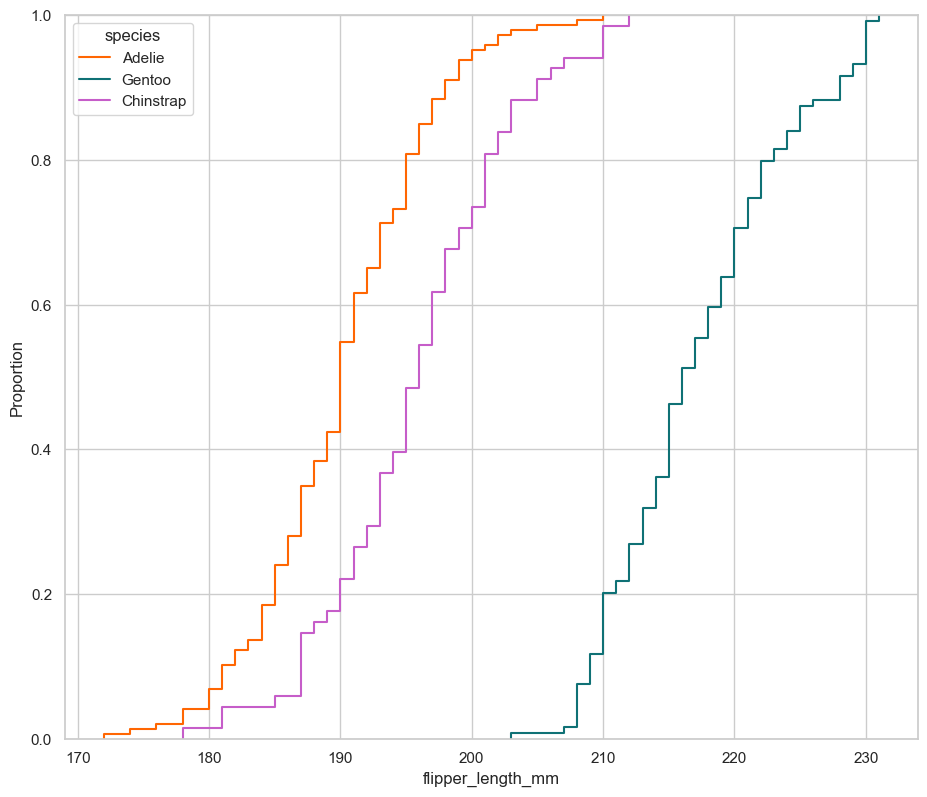

In [149]:
sns.ecdfplot(
    processed_penguins_df,
    x="flipper_length_mm",
    hue="species",
    palette=penguin_color
)
plt.show()

##### Función de probabilidad de densidad (PDF)

Nos da la probabilidad de que una variable aleatoria discreta tome un valor determinado.

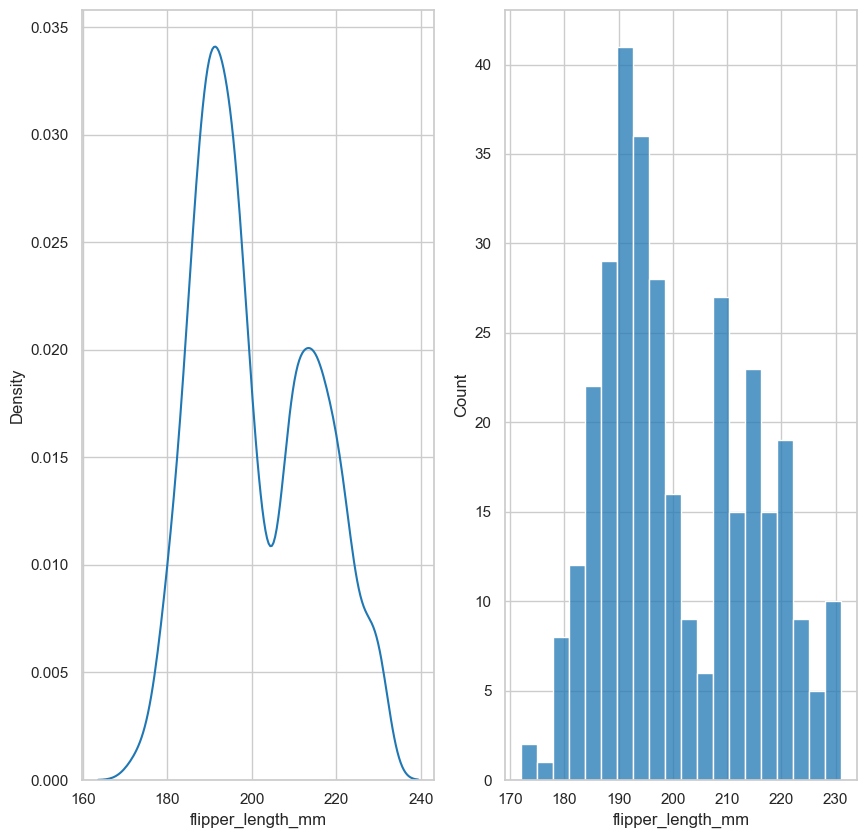

In [150]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
sns.kdeplot(
    processed_penguins_df,
    x="flipper_length_mm",
    bw_method=0.2,
    ax=ax[0]
    # hue="species"
)
sns.histplot(
    processed_penguins_df,
    x="flipper_length_mm",
    ax=ax[1],
    bins=20
    # hue="species"
)
plt.show()

In [151]:
stats_body_mass_g = processed_penguins_df["body_mass_g"].describe()
stats_body_mass_g

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

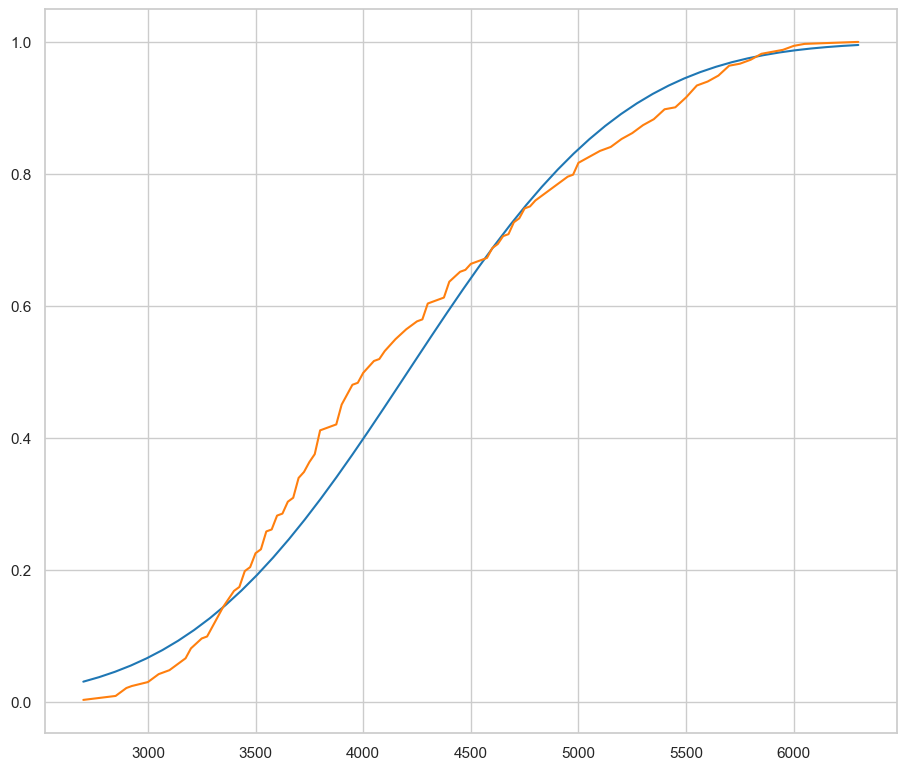

In [152]:
xs = np.linspace(stats_body_mass_g["min"], stats_body_mass_g["max"])
ys = stats.norm(stats_body_mass_g["mean"], stats_body_mass_g["std"]).cdf(xs)

# sns.lineplot(x=xs, y=ys)
plt.plot(xs, ys)
empiricaldist.Cdf.from_seq(
    processed_penguins_df["body_mass_g"]
).plot()
plt.show()

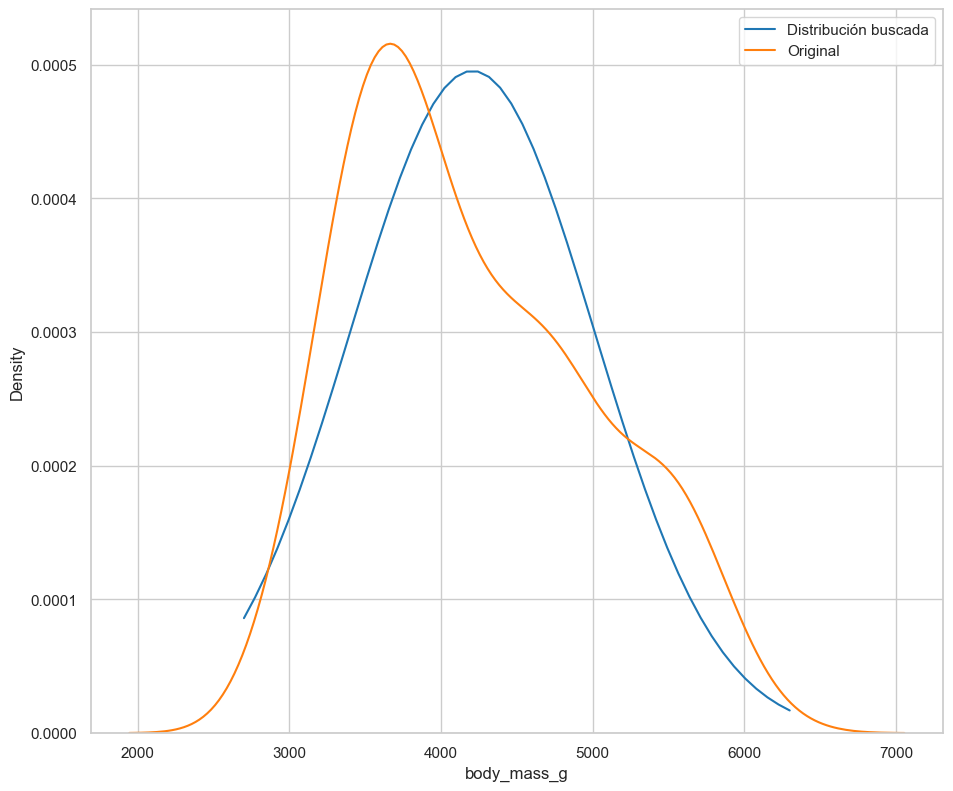

In [153]:
xs = np.linspace(stats_body_mass_g["min"], stats_body_mass_g["max"])
ys = stats.norm(stats_body_mass_g["mean"], stats_body_mass_g["std"]).pdf(xs)

# sns.lineplot(x=xs, y=ys)
plt.plot(xs, ys, label="Distribución buscada")
sns.kdeplot(processed_penguins_df, x="body_mass_g", label="Original")
plt.legend()
plt.show()

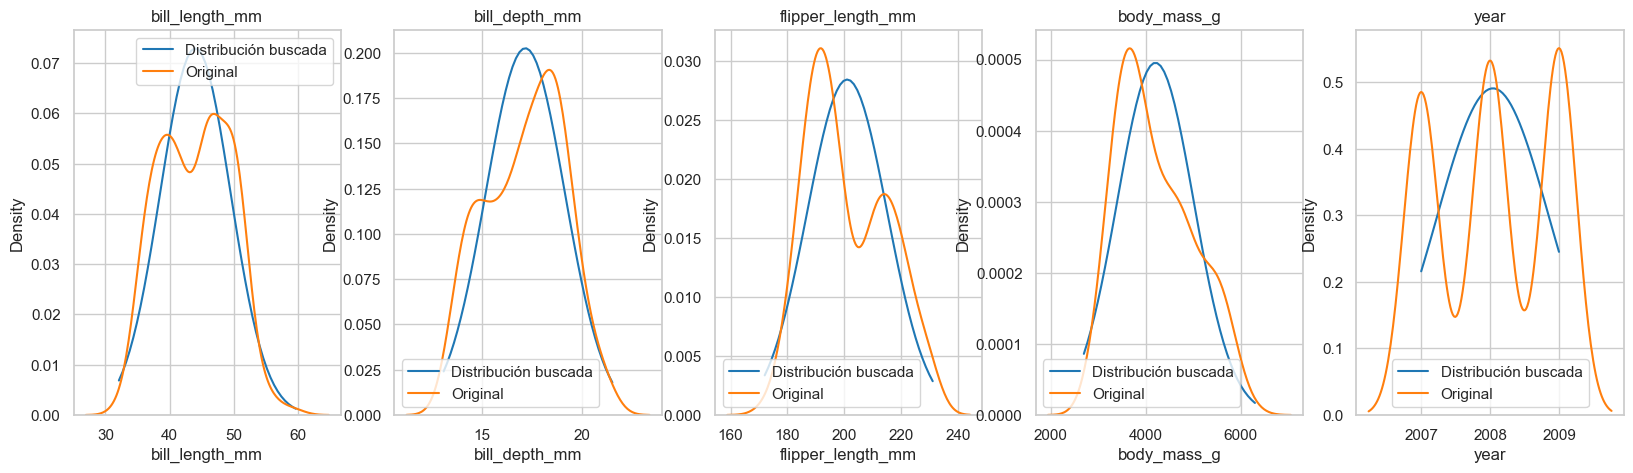

In [154]:
fig, ax = plt.subplots(1, len(numeric_columns), figsize=(20,5))

for i, column in enumerate(numeric_columns):
    xs = np.linspace(processed_penguins_df[column].describe()["min"], processed_penguins_df[column].describe()["max"])
    ys = stats.norm(processed_penguins_df[column].describe()["mean"], processed_penguins_df[column].describe()["std"]).pdf(xs)

    # sns.lineplot(x=xs, y=ys)
    ax[i].set_title(column)
    ax[i].plot(xs, ys, label="Distribución buscada")
    sns.kdeplot(processed_penguins_df, x=column, label="Original", ax=ax[i])
    ax[i].legend()
plt.show()

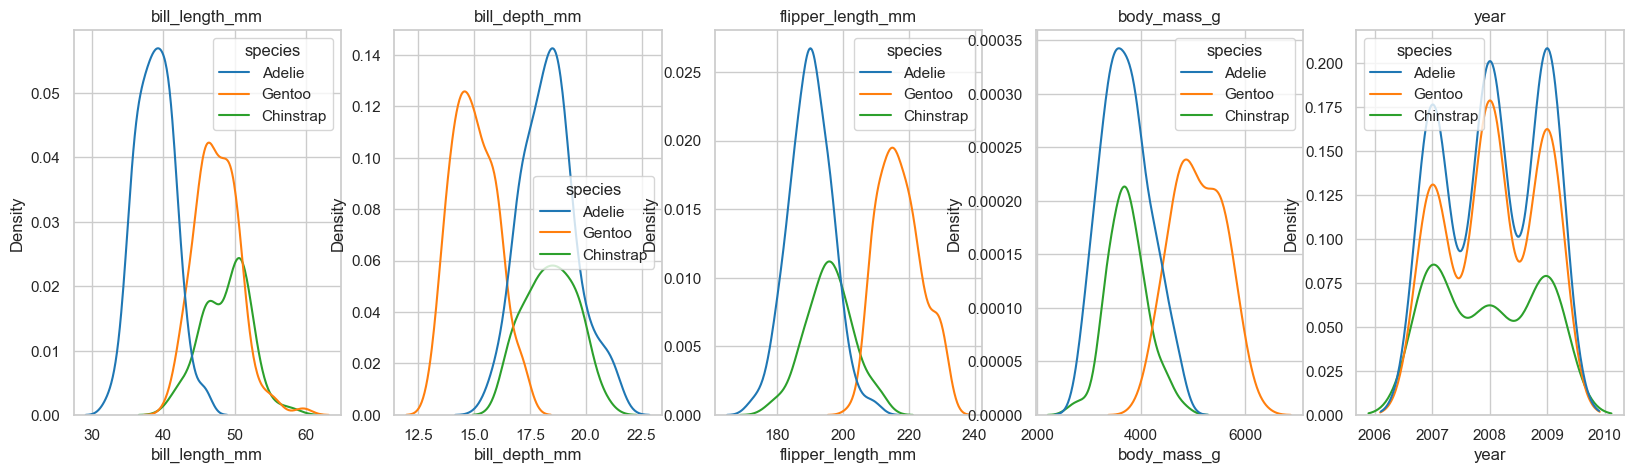

In [155]:
fig, ax = plt.subplots(1, len(numeric_columns), figsize=(20,5))

for i, column in enumerate(numeric_columns):
    xs = np.linspace(processed_penguins_df[column].describe()["min"], processed_penguins_df[column].describe()["max"])
    ys = stats.norm(processed_penguins_df[column].describe()["mean"], processed_penguins_df[column].describe()["std"]).pdf(xs)

    # sns.lineplot(x=xs, y=ys)
    ax[i].set_title(column)
    # ax[i].plot(xs, ys, label="Distribución buscada")
    sns.kdeplot(processed_penguins_df, x=column, 
                ax=ax[i], hue="species")
plt.show()

### Ley de los grandes números

A medida de que se aumenten la cantidad de datos de un problema, la distribución se va viendo de manera más clara, tiende a la probabilidad teórica.

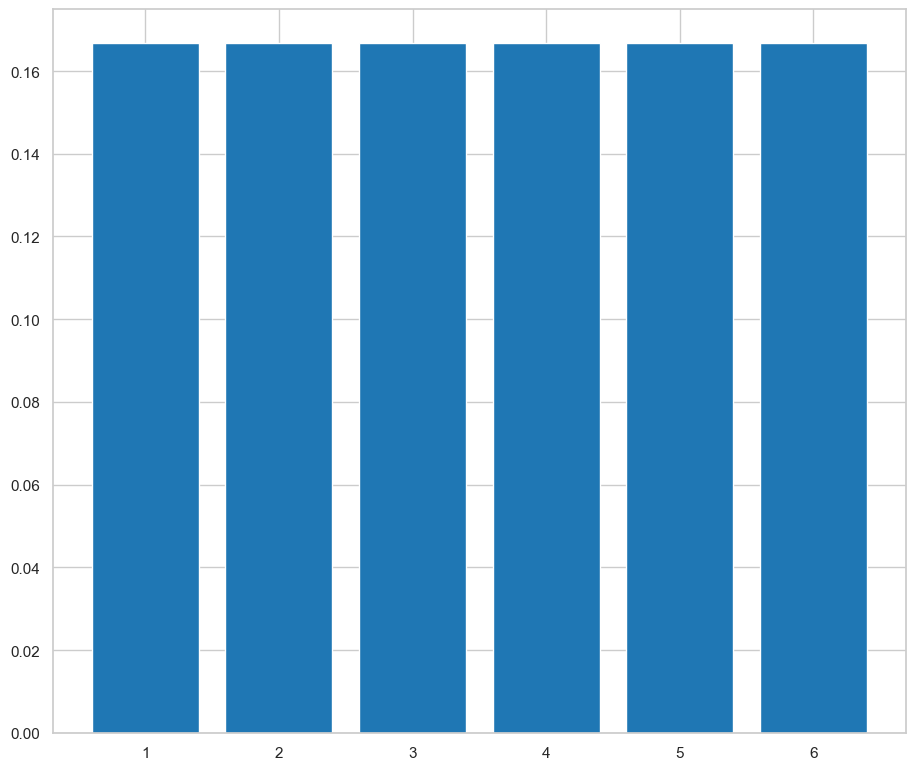

In [156]:
dice = empiricaldist.Pmf.from_seq([1, 2, 3, 4, 5, 6])
dice.bar()

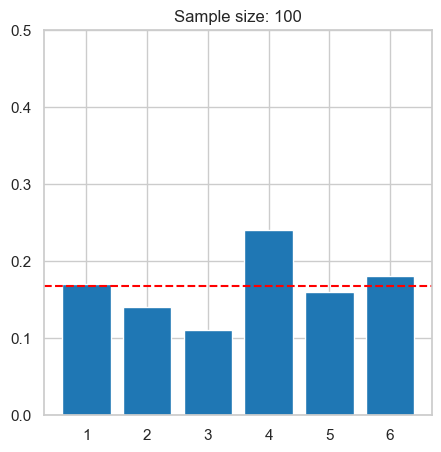

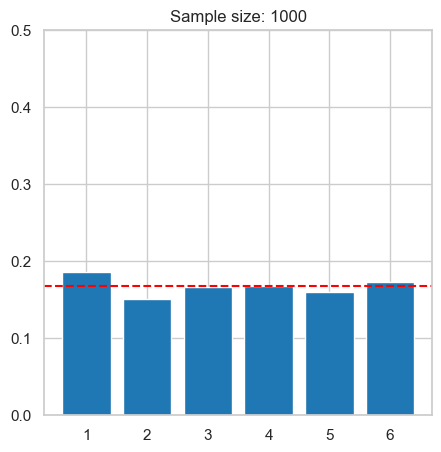

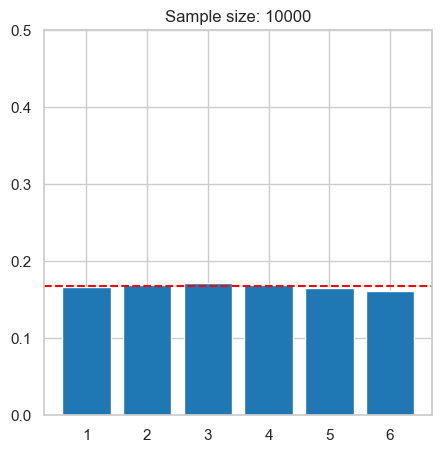

In [157]:
for sample_size in (1e2, 1e3, 1e4):
    sample_size = int(sample_size)
    values = dice.sample(sample_size)
    sample_pmf = empiricaldist.Pmf.from_seq(values)
    
    plt.figure(figsize=(5, 5))
    sample_pmf.bar()
    plt.axhline(y=1/6, color="red", linestyle="dashed")
    plt.ylim([0, 0.50])
    plt.title(f"Sample size: {sample_size}")
    

### Teorema del límite central

La media de las muestras tienden a una distribución normal. La suma de n variables aleatorias independientes con medias y varianzas finitas converge a una variable aleatoria con distribución normal

<AxesSubplot: >

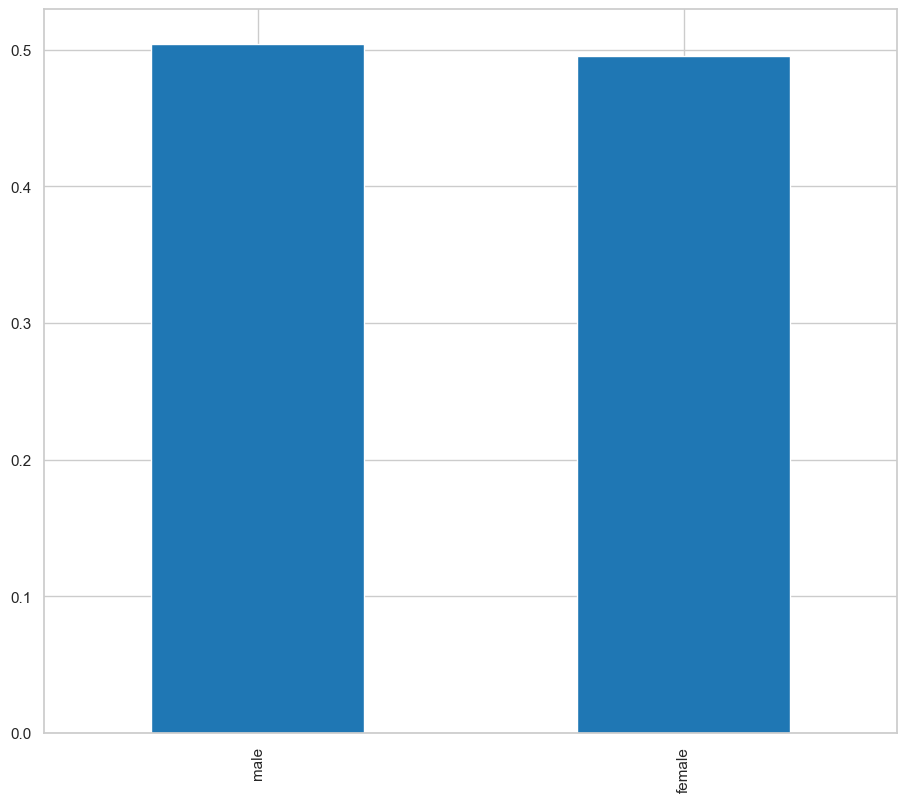

In [158]:
processed_penguins_df["sex"].value_counts(normalize=True).plot(kind="bar")

In [159]:
# Se observa que esta es una distribución binomial, por lo que se desea convertir los datos a numeros

sex_numeric = processed_penguins_df["sex"].replace(["male", "female"], [1, 0])

In [160]:
number_samples = 1000
sample_size = 35

np.random.seed(42)

# definimos el DataFrame en blanco con su tamaño definido
samples_df = pd.DataFrame(np.random.randint(1, sample_size, size =(sample_size, number_samples)))
# Le asignamos nombres a las columnas.
col_names = []
for i in range(1, number_samples + 1):    
    col_names.append(f"sample_{i}")
samples_df.columns = col_names


for i in range(1, number_samples + 1):
    sex_numeric_sample = sex_numeric.sample(sample_size, replace=True).to_numpy()    
    sample_name = f"sample_{i}"
    samples_df[sample_name] = sex_numeric_sample

male_population_mean = samples_df.mean().mean()
print(f"El porcentaje estimado de pingüinos machos en la población es: {male_population_mean * 100:.4f}%")

El porcentaje estimado de pingüinos machos en la población es: 50.7343%


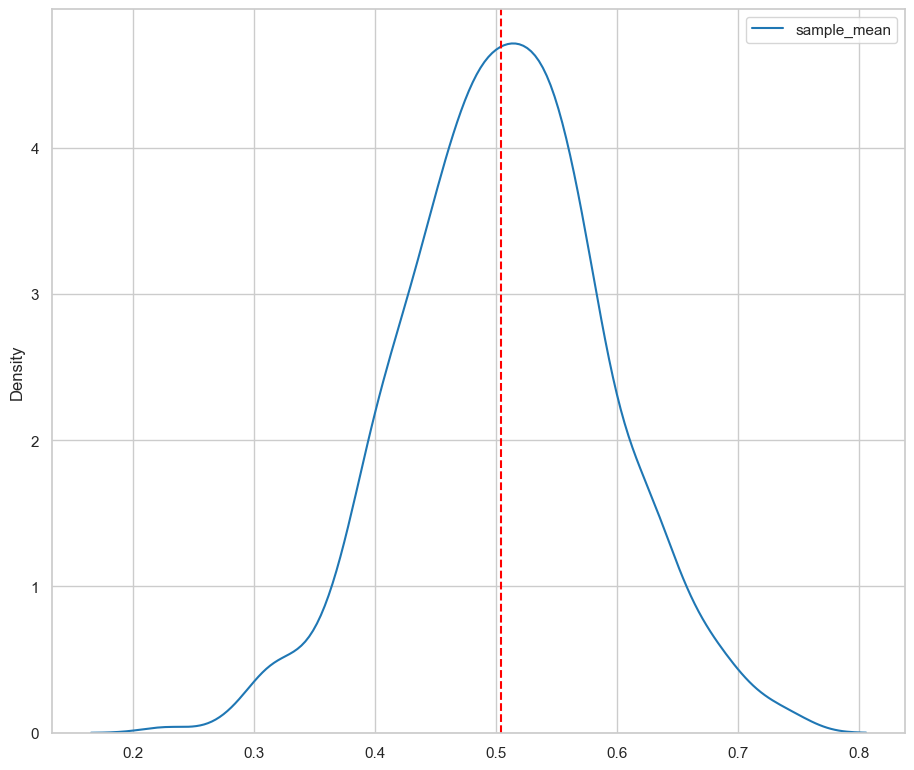

In [161]:
sample_means_binomial = pd.DataFrame(samples_df.mean(), columns=["sample_mean"])
sns.kdeplot(sample_means_binomial)
plt.axvline(x=sex_numeric.mean(), color="red", linestyle="dashed")
plt.show()

### Analisis bivariado

#### Gráfica de puntos

In [162]:
processed_penguins_df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

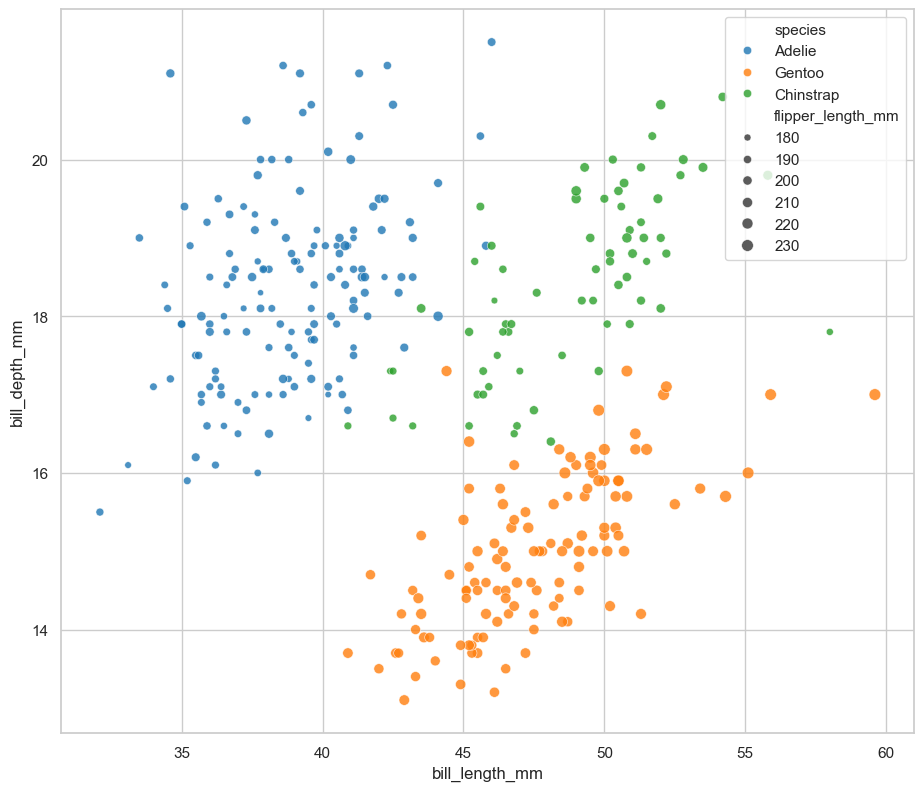

In [163]:
sns.scatterplot(processed_penguins_df,
                x="bill_length_mm",
                y="bill_depth_mm",
                hue="species",
                alpha=0.8,
                size="flipper_length_mm")
plt.show()

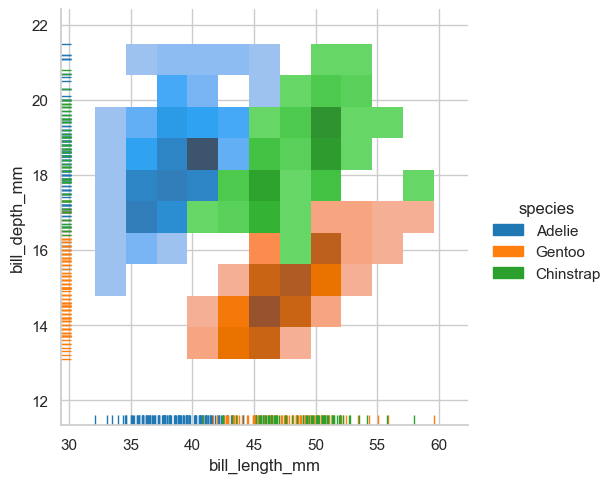

In [164]:
sns.displot(processed_penguins_df,
                x="bill_length_mm",
                y="bill_depth_mm",
                hue="species",
                rug=True)
plt.show()

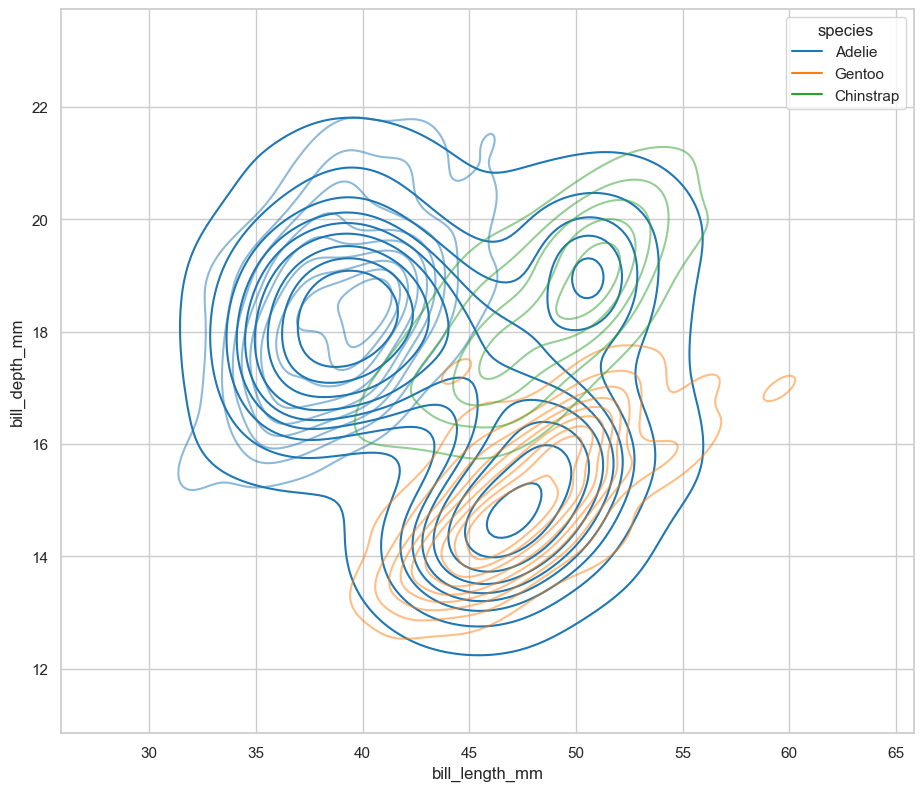

In [165]:
sns.kdeplot(processed_penguins_df,
                x="bill_length_mm",
                y="bill_depth_mm"
                )
sns.kdeplot(processed_penguins_df,
                x="bill_length_mm",
                y="bill_depth_mm",
                hue="species",
                alpha=0.5
                )
plt.show()

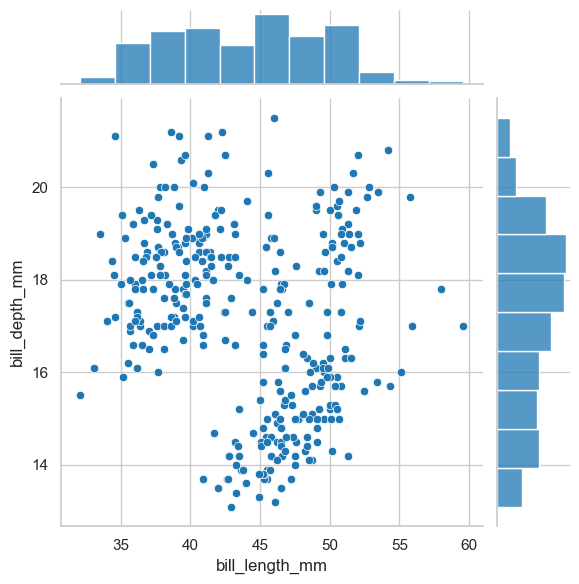

In [166]:
sns.jointplot(processed_penguins_df,
              x="bill_length_mm",
              y="bill_depth_mm"
              )
plt.show()

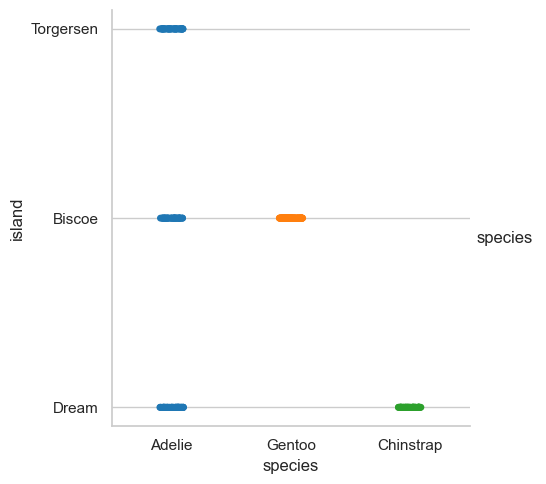

In [167]:
sns.catplot(
    processed_penguins_df,
    x="species",
    y="island",
    hue="species",
    kind="strip"
)

#### Violín y Boxplot

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

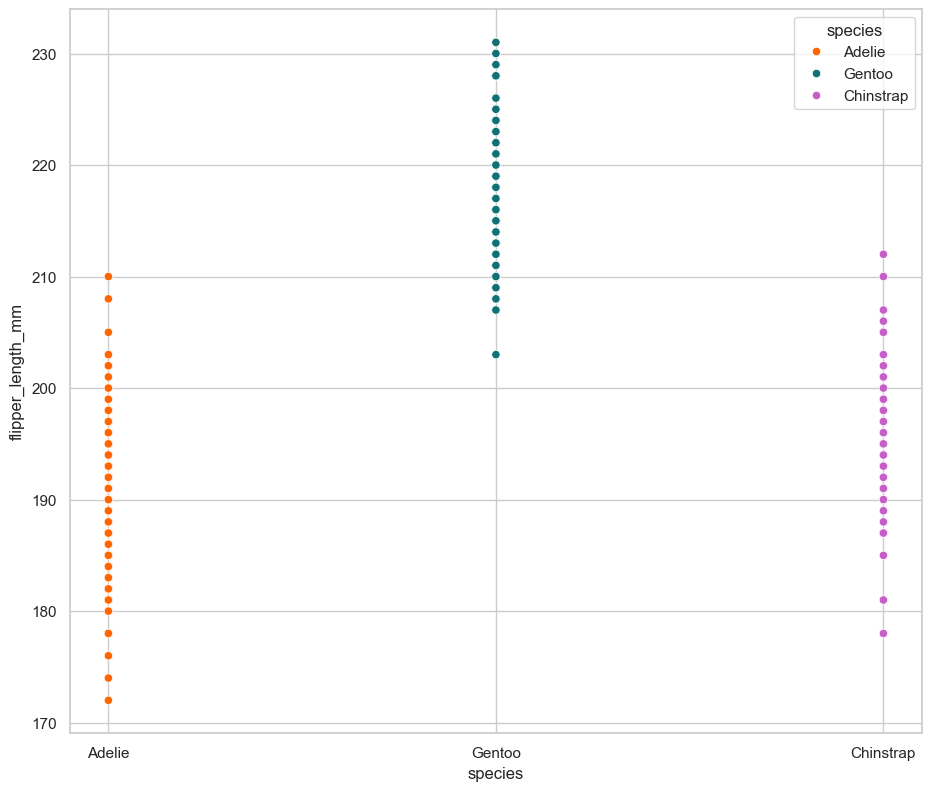

In [168]:
sns.scatterplot(
    processed_penguins_df,
    x="species",
    y="flipper_length_mm",
    hue="species",
    palette=penguin_color
)

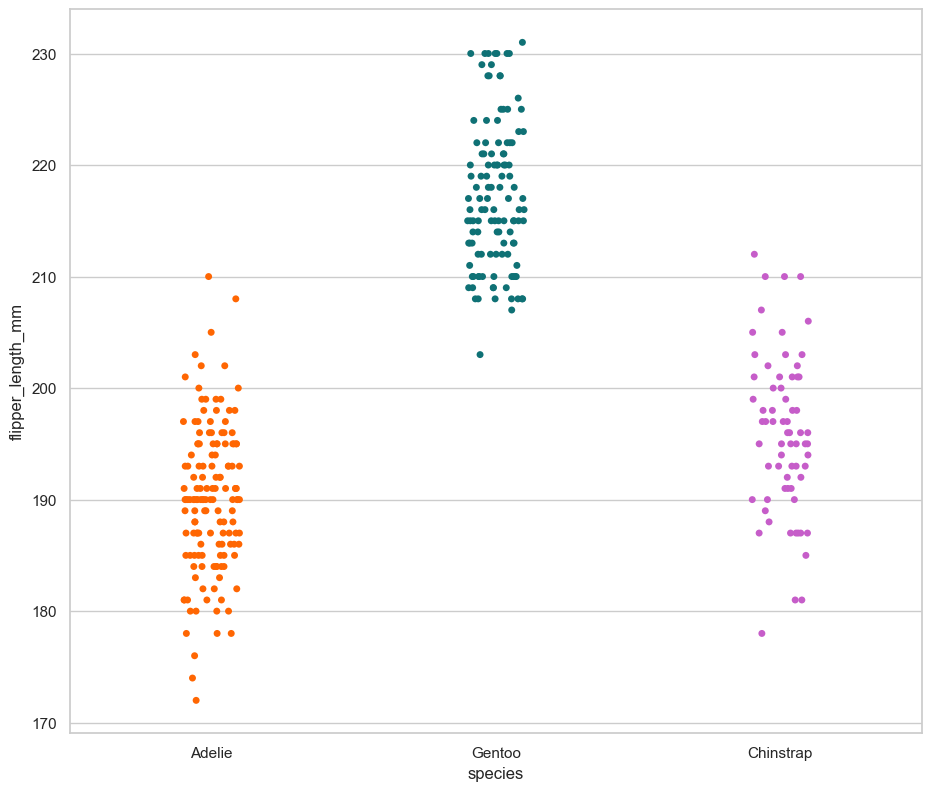

In [169]:
sns.stripplot(
    processed_penguins_df,
    x="species",
    y="flipper_length_mm",
    hue="species",
    palette=penguin_color
)
plt.show()

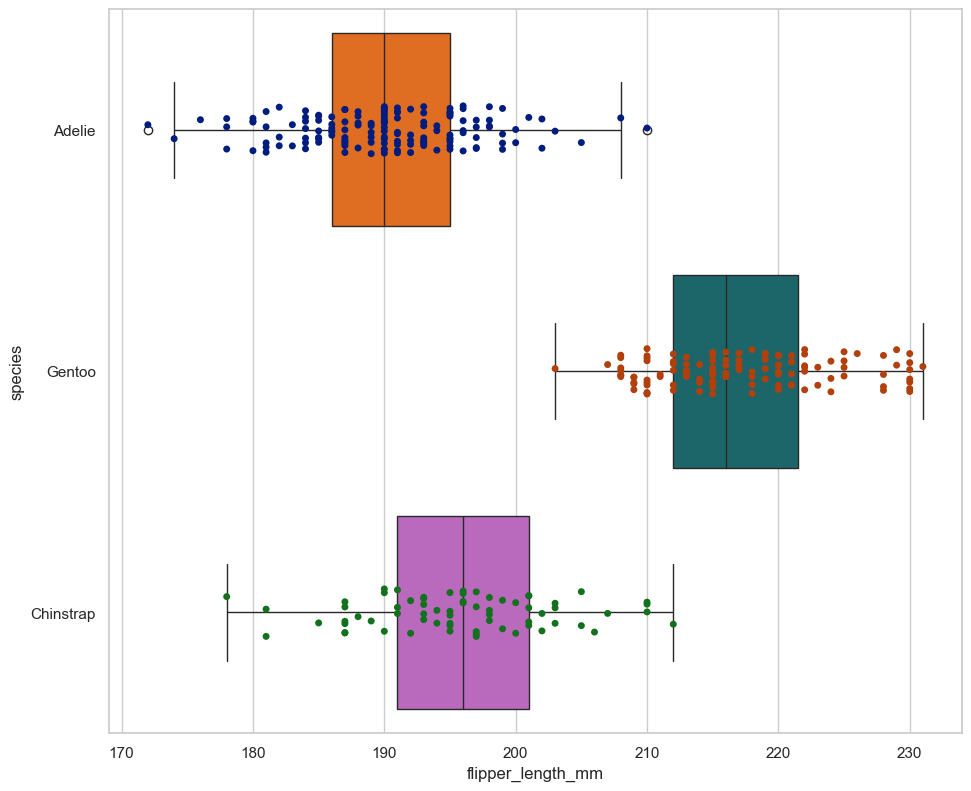

In [170]:
sns.boxplot(
    processed_penguins_df,
    x="flipper_length_mm",
    y="species",
    hue="species",
    palette=penguin_color
)
sns.stripplot(
    processed_penguins_df,
    x="flipper_length_mm",
    y="species",
    hue="species",
    palette="dark"
)

plt.show()

<AxesSubplot: xlabel='island', ylabel='body_mass_g'>

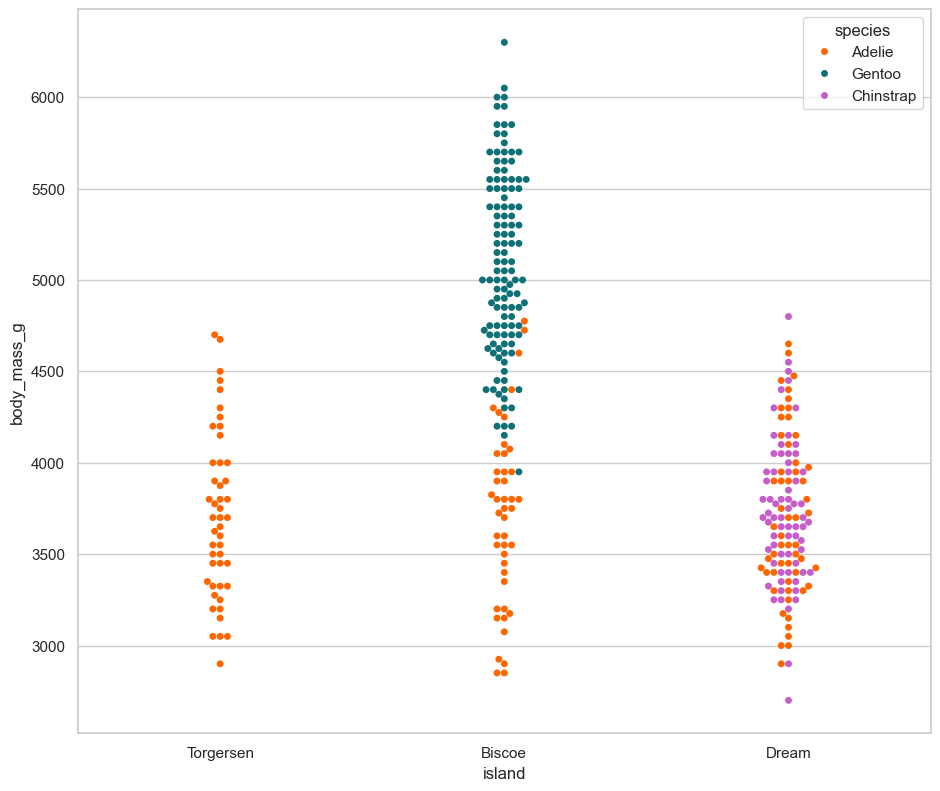

In [171]:
sns.swarmplot(
    data=processed_penguins_df,
    x='island',
    y='body_mass_g',
    hue='species',
    palette=penguin_color
)


<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

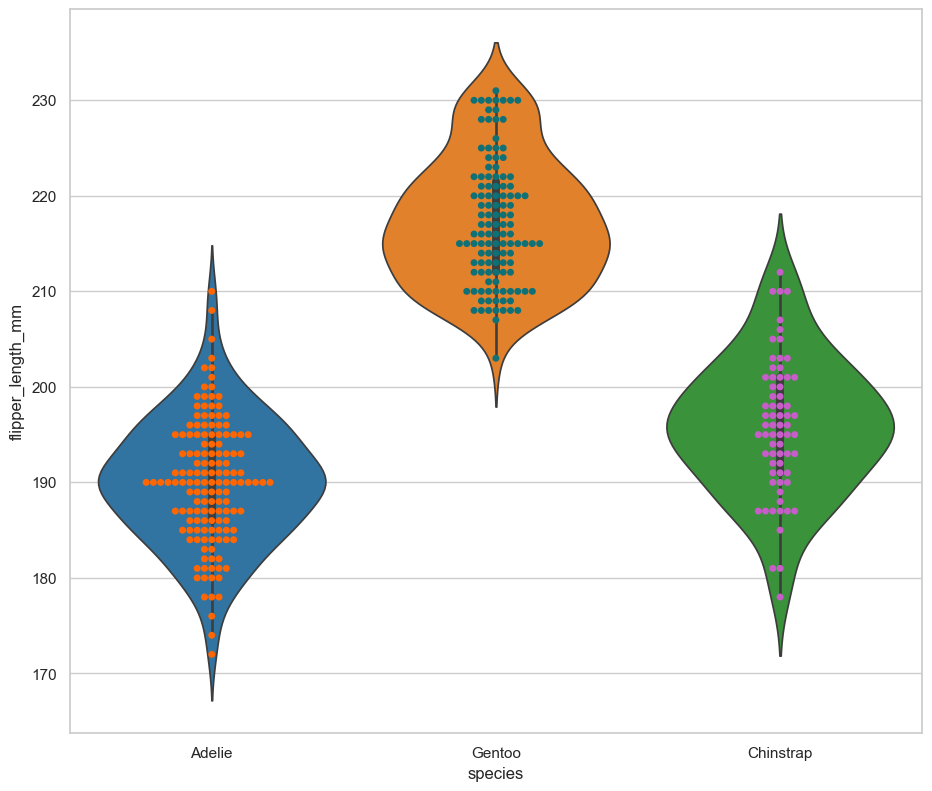

In [172]:
sns.swarmplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)
sns.violinplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species'
)

#### [Correlacion](./4.%20Estadistica%20Descriptiva.ipynb)

In [173]:
processed_penguins_df.corr(numeric_only=True)

bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   
year                     0.032657      -0.048182           0.151068   

                   body_mass_g      year  
bill_length_mm        0.589451  0.032657  
bill_depth_mm        -0.472016 -0.048182  
flipper_length_mm     0.872979  0.151068  
body_mass_g           1.000000  0.021862  
year                  0.021862  1.000000

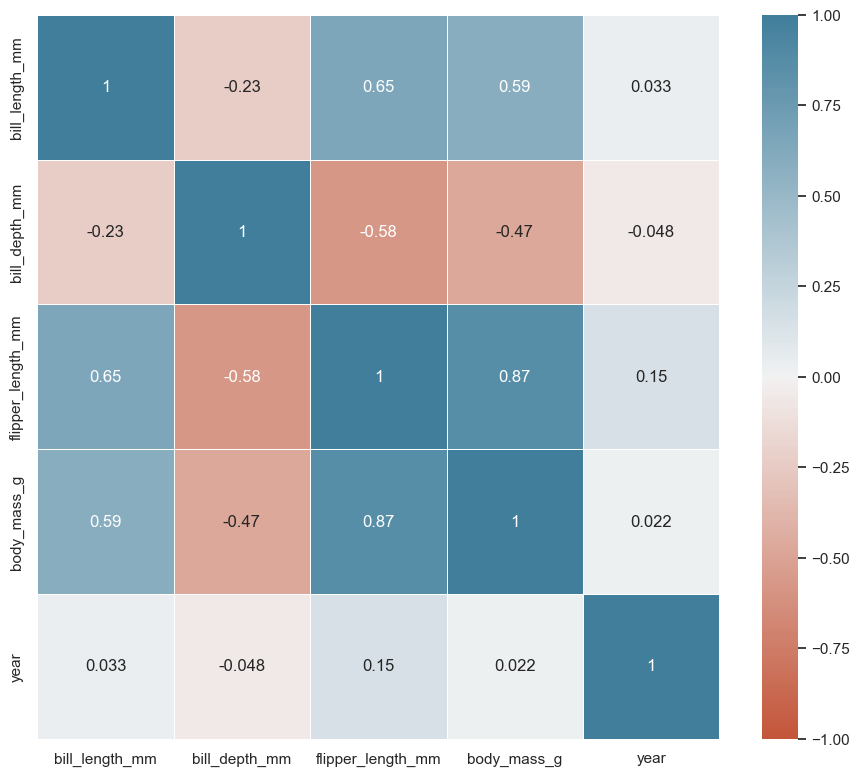

In [174]:
sns.heatmap(
    processed_penguins_df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)
plt.show()

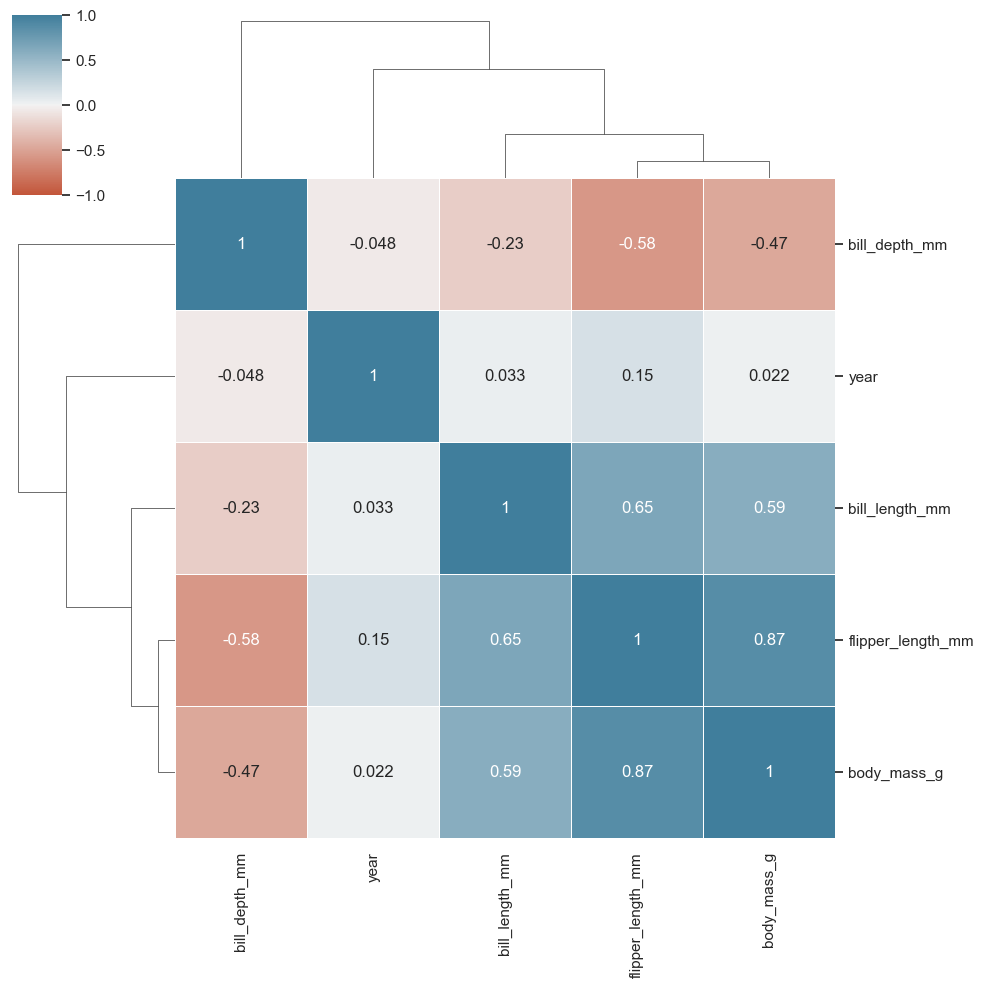

In [175]:
sns.clustermap(
    processed_penguins_df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)
plt.show()

In [176]:
df_s = (
    processed_penguins_df
    .assign(
        numeric_sex=lambda df: df["sex"].replace(["female", "male"], [0, 1])
    )
)

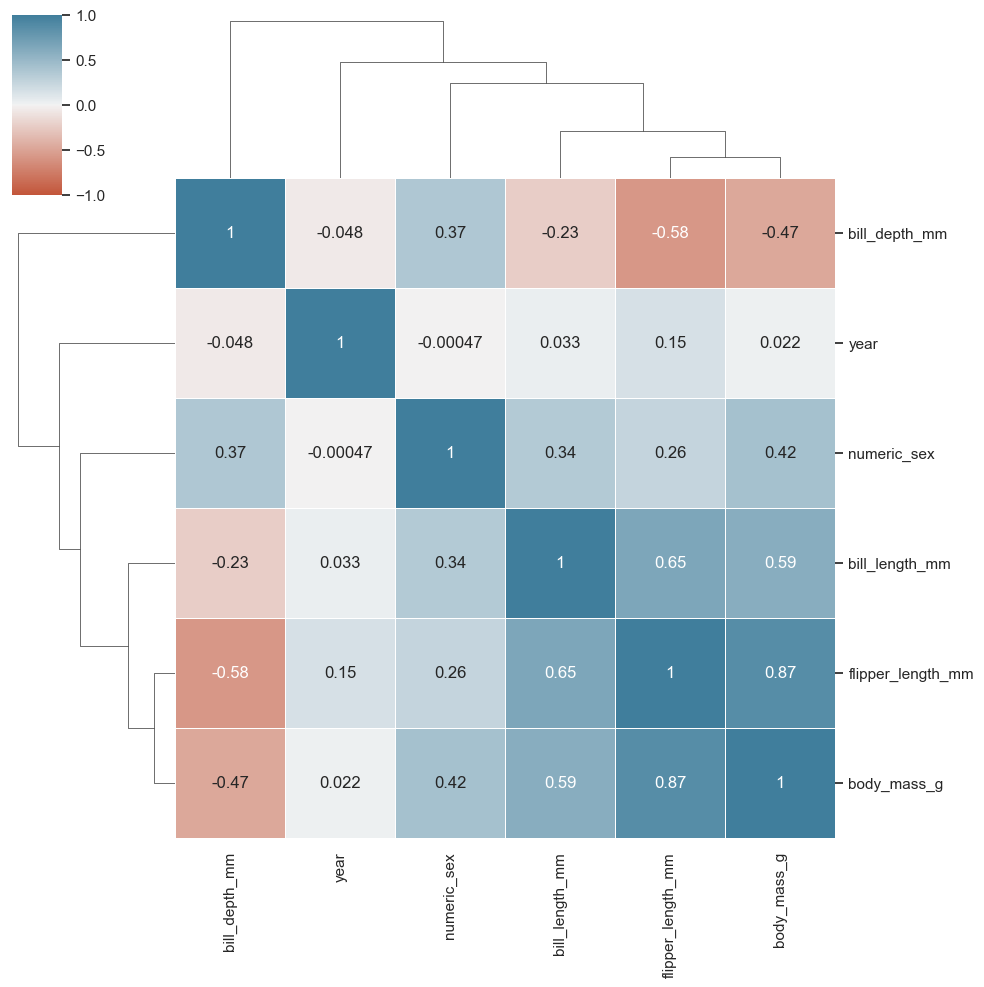

In [177]:
sns.clustermap(
    df_s.corr(numeric_only=True),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)
plt.show()

El problema de la correlación es que no detecta del todo el impacto de las relaciones

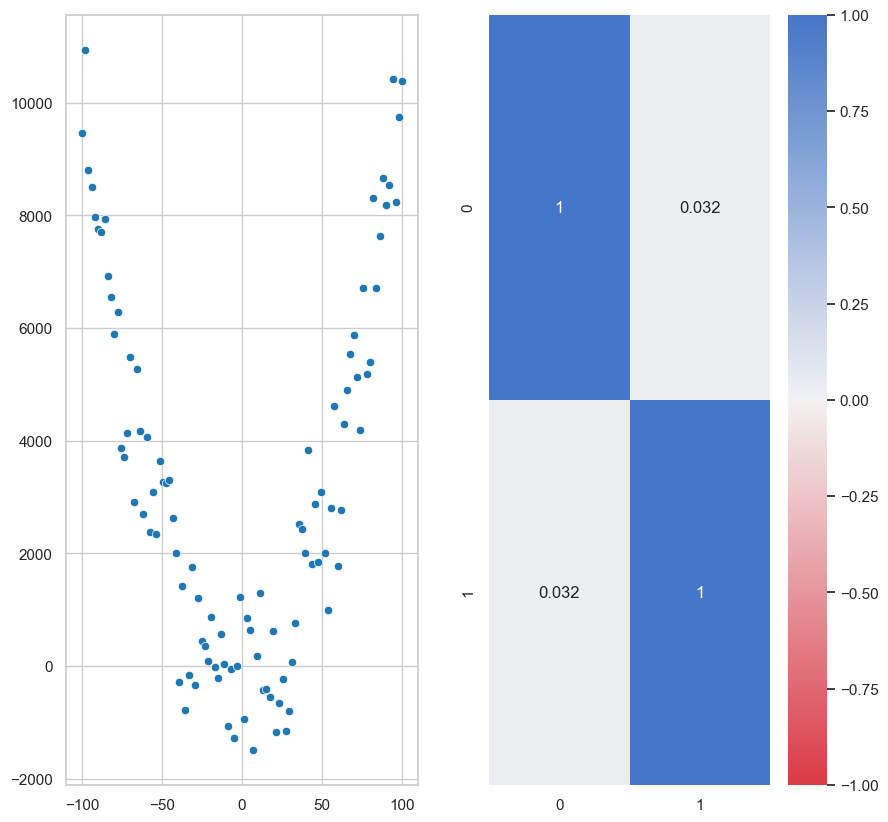

In [178]:
x = np.linspace(-100, 100, 100)
y = x**(2)
y += np.random.normal(0, 1000, x.size)

fig, ax = plt.subplots(1, 2, figsize=(10, 10))

sns.scatterplot(x=x, y=y, ax=ax[0])
sns.heatmap(np.corrcoef(x, y), ax=ax[1], 
            annot=True, cmap=sns.diverging_palette(10, 254, as_cmap=True),
            vmin=-1, vmax=1)
plt.show()

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

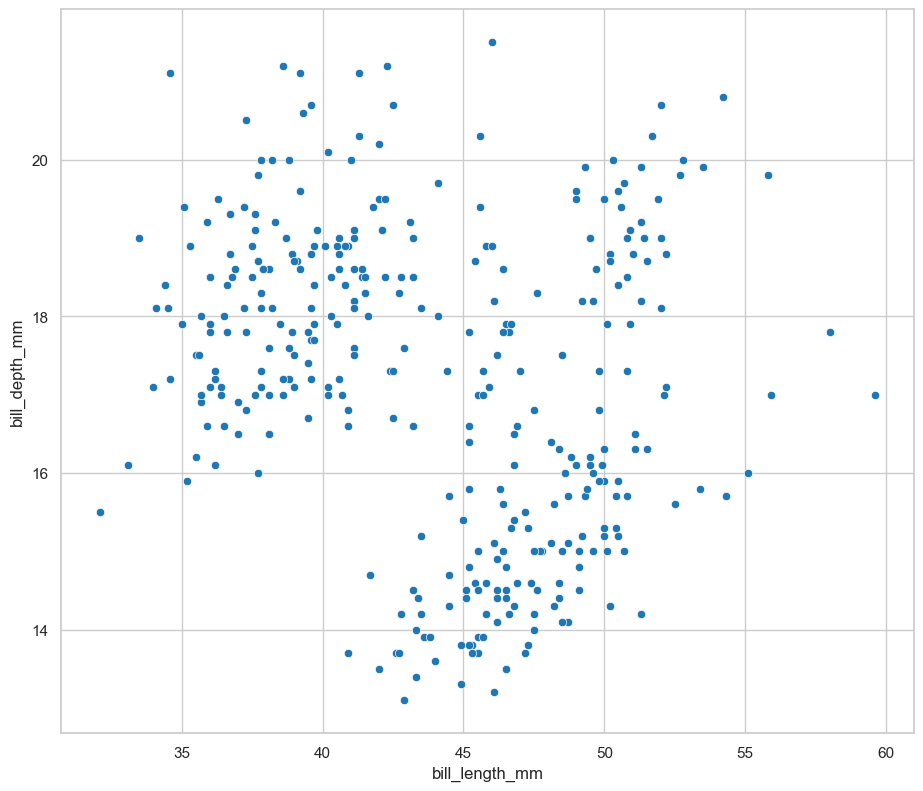

In [179]:
sns.scatterplot(
    preprocess_penguins_df,
    x="bill_length_mm",
    y="bill_depth_mm"
)

[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


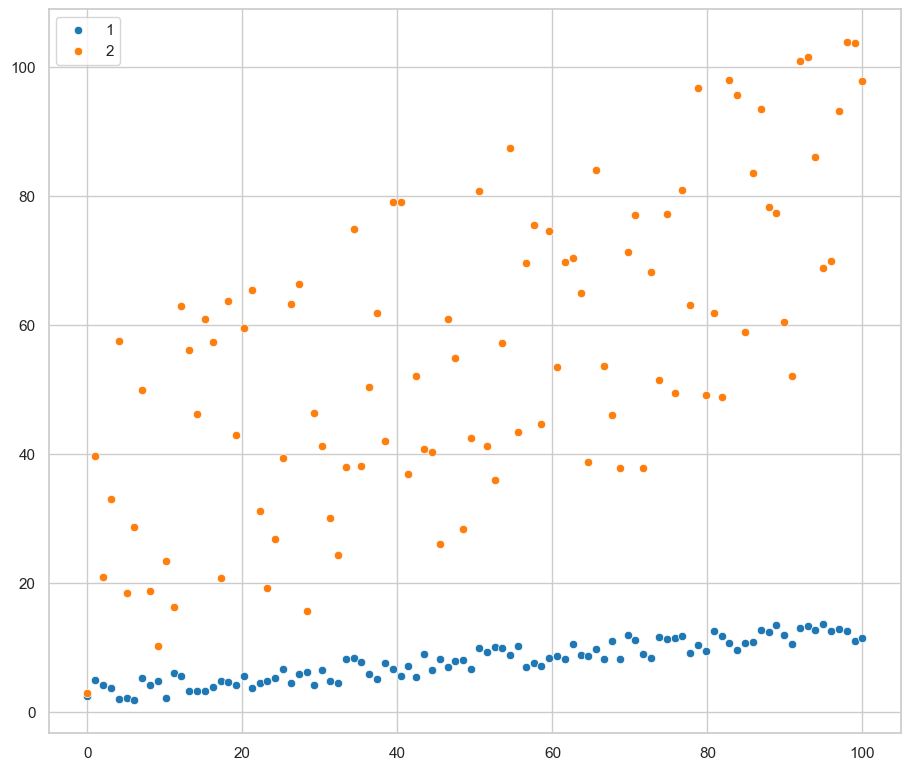

In [180]:
np.random.seed(42)
x1 = np.linspace(0,100,100)
y1 = 0.1* x1 +3 + np.random.uniform(-2,2,size=x1.size)

sns.scatterplot(x=x1, y=y1)


x2 = np.linspace(0,100,100)
y2 = 0.5* x1 +1 + np.random.uniform(0,60,size=x2.size)

sns.scatterplot(x=x2, y=y2)

plt.legend(["1","2"])

print(np.corrcoef(x1,y1))
print(np.corrcoef(x2,y2))

#### Estableciendo relaciones

**slope**: representa la pendiente de la línea de regresión. Indica cuánto cambia la variable dependiente por unidad de cambio en la variable independiente. En este caso, un aumento de una unidad en la longitud del pico se asocia con un aumento de 0.0119 en la masa del pingüino.

**intercept**: representa el valor de la variable dependiente cuando la variable independiente es igual a cero. En este caso, el intercepto indica la masa del pingüino cuando la longitud del pico es cero, lo que no tiene mucho sentido en términos prácticos.

**rvalue**: representa el coeficiente de correlación entre las dos variables. Indica cuánto se ajustan los datos a la línea de regresión. El valor de rvalue oscila entre -1 y 1, y un valor cercano a 1 indica una correlación positiva fuerte entre las variables. En este caso, el valor de rvalue es 0.6416, lo que indica una correlación moderadamente fuerte entre la longitud del pico y la masa del pingüino.

**pvalue**: representa el valor p asociado a la hipótesis nula de que no hay relación entre las dos variables. Un valor p pequeño (generalmente < 0.05) indica que la hipótesis nula puede ser rechazada y que hay evidencia suficiente para decir que existe una relación significativa entre las variables. En este caso, el valor de pvalue es 3.7481e-09, que es muy pequeño y sugiere que hay una relación significativa entre la longitud del pico y la masa del pingüino.

**stderr** y **intercept_stderr**: representan el error estándar de la pendiente y el intercepto, respectivamente. Indican cuánto varía la pendiente y el intercepto en diferentes muestras de datos. En este caso, valores más pequeños indican que el ajuste del modelo es más preciso y confiable.

In [181]:
res_1 = stats.linregress(x=x1, y=y1)
res_2 = stats.linregress(x=x2, y=y2)

print(res_1, res_2, sep="\n")

LinregressResult(slope=0.10081969280979615, intercept=2.8397383330230292, rvalue=0.9276161661149585, pvalue=1.0607043467839354e-43, stderr=0.004101050284084736, intercept_stderr=0.2373714102742458)
LinregressResult(slope=0.5470008424819226, intercept=28.519861265205236, rvalue=0.6747634267657527, pvalue=1.388369987899253e-14, stderr=0.06043657503136455, intercept_stderr=3.498107570885824)


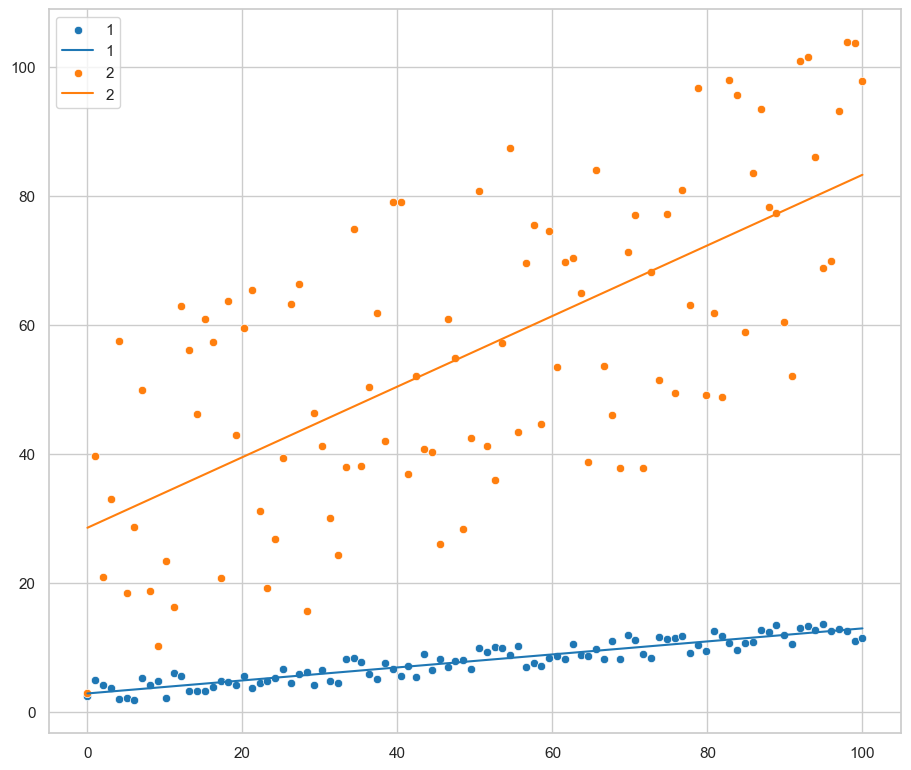

In [182]:
sns.scatterplot(x=x1, y=y1)

fx1 = np.array([x1.min(), x1.max()])
fy1 = res_1.intercept + res_1.slope * fx1

plt.plot(fx1, fy1)


sns.scatterplot(x=x2, y=y2)

fx2 = np.array([x2.min(), x2.max()])
fy2 = res_2.intercept + res_2.slope * fx2

plt.plot(fx2, fy2)

plt.legend(["1", "1","2","2"])

LinregressResult(slope=-0.08232675339862282, intercept=20.78664866843383, rvalue=-0.22862563591302917, pvalue=2.5282897209442967e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)


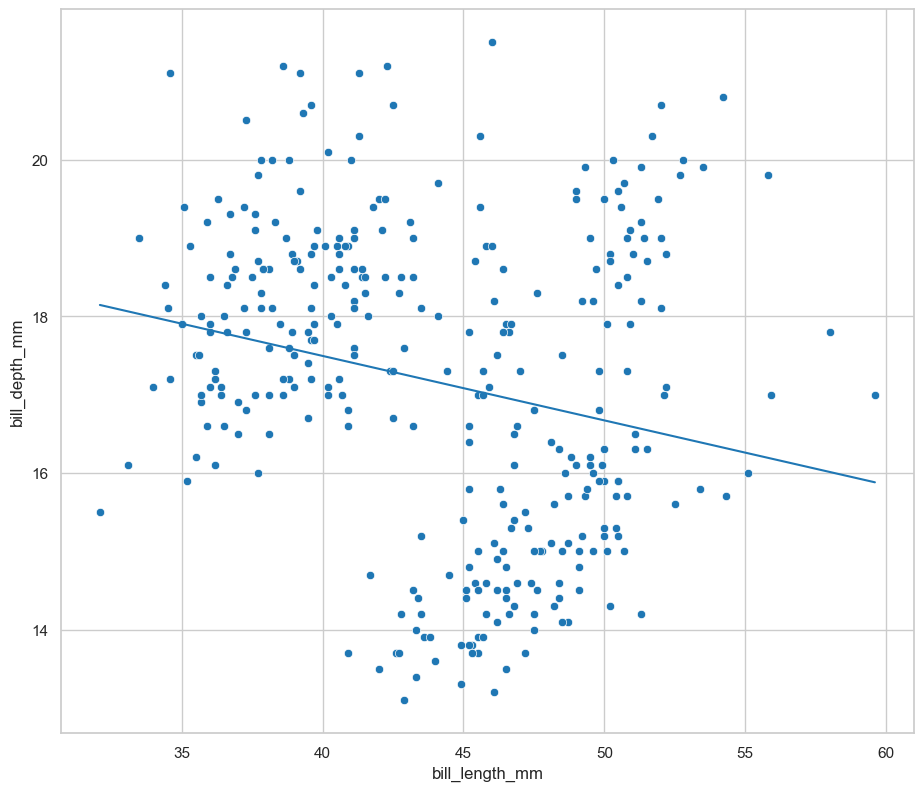

In [183]:
sns.scatterplot(processed_penguins_df, x="bill_length_mm", y="bill_depth_mm")

res_penguins = stats.linregress(x=processed_penguins_df.bill_length_mm, y=processed_penguins_df.bill_depth_mm)

print(res_penguins)

fx1 = np.array([processed_penguins_df.bill_length_mm.min(), processed_penguins_df.bill_length_mm.max()])
fy1 = res_penguins.intercept + res_penguins.slope * fx1

plt.plot(fx1,fy1) 

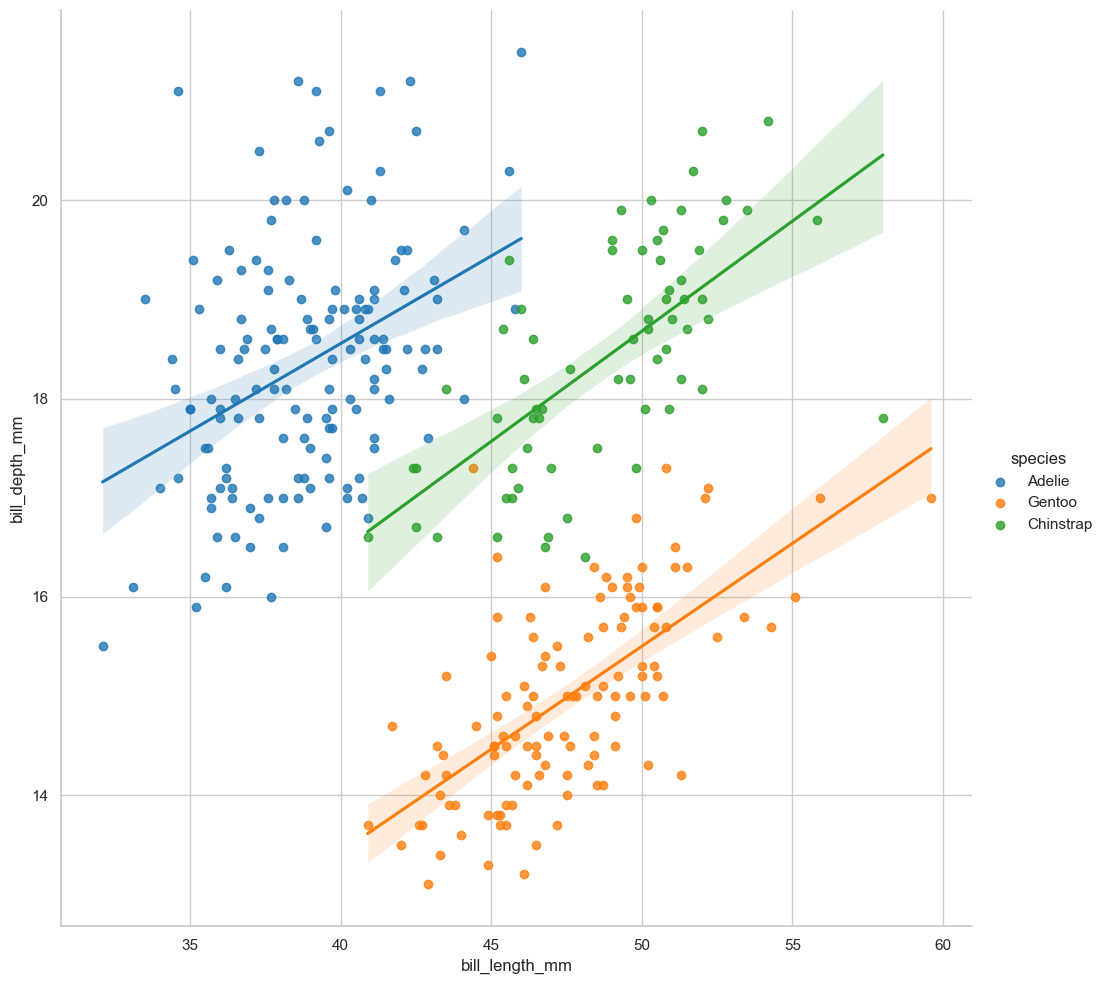

In [184]:
sns.lmplot(
    data=processed_penguins_df,
    x="bill_length_mm",
    y="bill_depth_mm",
    height=10,
    hue='species'
)

plt.show()

LinregressResult(slope=0.00661047277096393, intercept=165.60324098377686, rvalue=0.46485393026107635, pvalue=3.4016440857869256e-09, stderr=0.0010492237142985079, intercept_stderr=3.9180528615764905)
LinregressResult(slope=0.009340925526910201, intercept=169.66721958565057, rvalue=0.7113052561445228, pvalue=1.2493975624848216e-19, stderr=0.0008533440042105367, intercept_stderr=4.366443731939459)
LinregressResult(slope=0.01190506439617672, intercept=151.3808735739785, rvalue=0.6415594129316968, pvalue=3.7481299992316526e-09, stderr=0.00175210364329271, intercept_stderr=6.574823251756468)


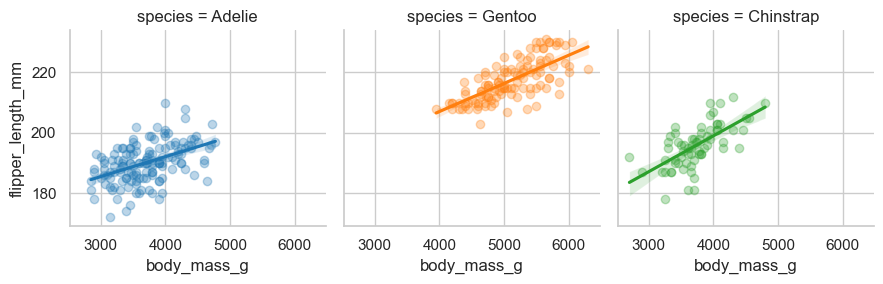

In [185]:
sns.FacetGrid(
    processed_penguins_df,
    col= 'species',
    hue = 'species'
    ).map(sns.regplot,
        'body_mass_g',
        'flipper_length_mm',
        scatter_kws={'alpha':0.3}
        )

adelie = processed_penguins_df[processed_penguins_df['species'] == 'Adelie']
gentoo = processed_penguins_df[processed_penguins_df['species'] == 'Gentoo']
chinstrap = processed_penguins_df[processed_penguins_df['species'] == 'Chinstrap']

ade = stats.linregress(x = adelie['body_mass_g'], y = adelie['flipper_length_mm'])
gen = stats.linregress(x = gentoo['body_mass_g'], y = gentoo['flipper_length_mm'])
chin = stats.linregress(x = chinstrap['body_mass_g'], y = chinstrap['flipper_length_mm'])

print(ade, gen, chin, sep='\n')

#### Limitaciones

- La regresión de A-B no es la misma que de B-A

In [186]:
y = processed_penguins_df["bill_depth_mm"]
x = processed_penguins_df["bill_length_mm"]

res_xy = stats.linregress(x, y)
res_yx = stats.linregress(y, x)

print(res_xy, res_yx, sep='\n')

LinregressResult(slope=-0.08232675339862282, intercept=20.78664866843383, rvalue=-0.22862563591302917, pvalue=2.5282897209442967e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)
LinregressResult(slope=-0.6349051704195025, intercept=54.89085424504756, rvalue=-0.22862563591302917, pvalue=2.5282897209442967e-05, stderr=0.1485977821662331, intercept_stderr=2.5673415135382553)


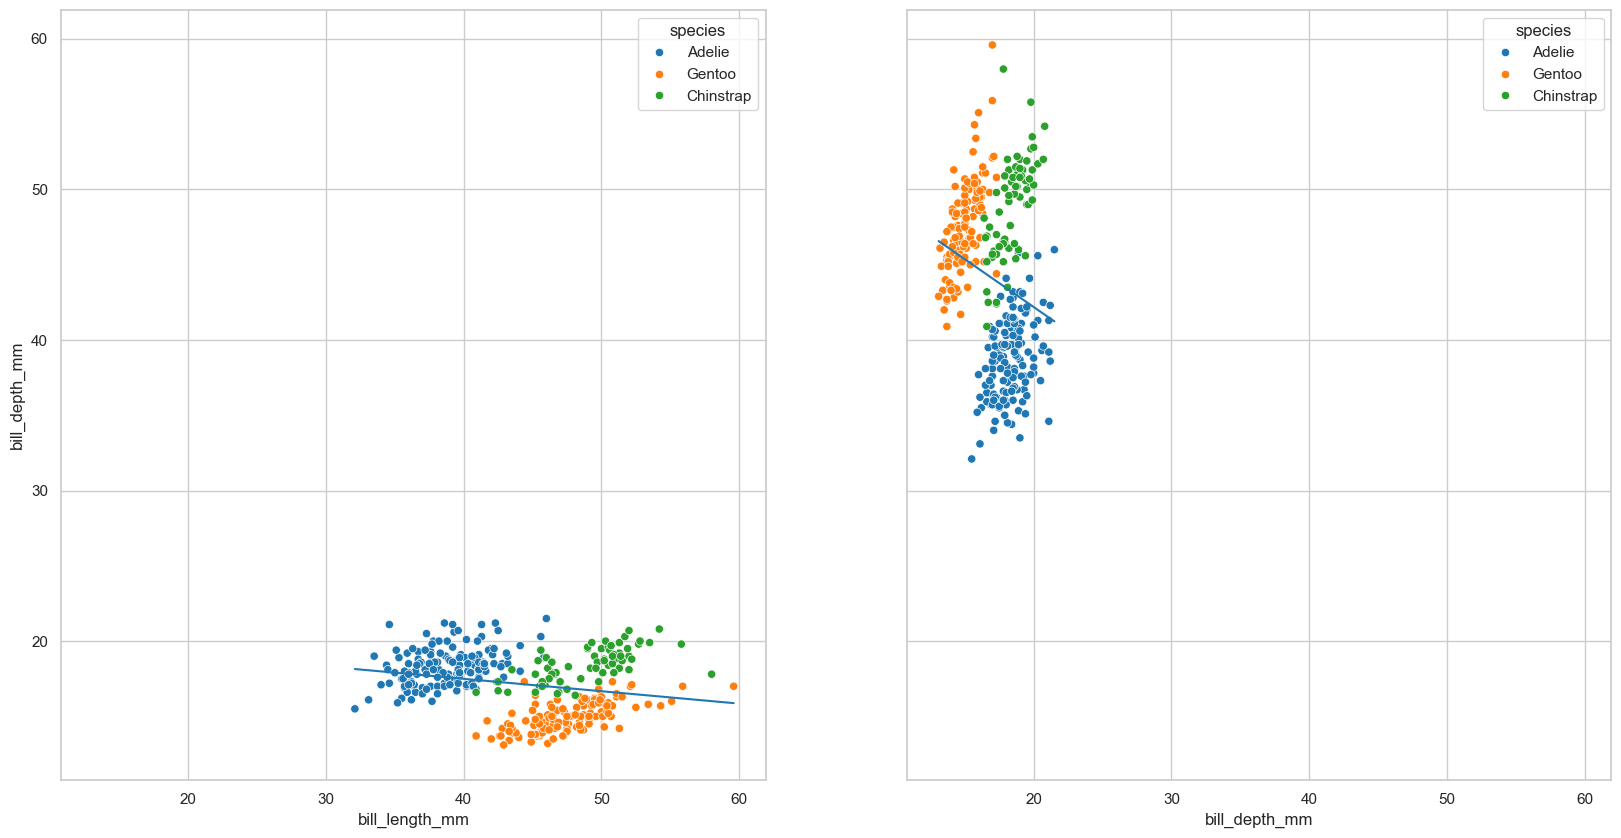

In [187]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20,10))

fxy1 = np.array([x.min(), x.max()])
fxy2 = res_xy.intercept + res_xy.slope * fxy1

fyx1 = np.array([y.min(), y.max()])
fyx2 = res_yx.intercept + res_yx.slope * fyx1

sns.lineplot(x=fxy1, y=fxy2, ax=ax[0])
sns.scatterplot(processed_penguins_df, x=x, y=y, 
                hue="species", ax=ax[0])

sns.lineplot(x=fyx1, y=fyx2, ax=ax[1])
sns.scatterplot(processed_penguins_df, x=y, y=x, ax=ax[1], hue="species")

plt.show()

- Si dos variables crecen o decrecen siguiendo las mismas pautas, no implica necesariamente que una cause otra

In [188]:
(
    smf.ols(
    formula="bill_length_mm ~ bill_depth_mm",
    data=processed_penguins_df
    )
    .fit()
    .params
)

Intercept        54.890854
bill_depth_mm    -0.634905
dtype: float64

In [189]:
(
    smf.ols(
    formula="bill_depth_mm ~ bill_length_mm",
    data=processed_penguins_df
    )
    .fit()
    .params
)

Intercept         20.786649
bill_length_mm    -0.082327
dtype: float64

- Solo puede manejar relaciones lineales

### Análisis multivariado

#### Regresión múltiple

A diferencia del lineal, esta regresión nos habla de las relaciones entre varias varibles y que tanto afecta el comportamiento de la variable objetivo

##### Crear modelos

In [190]:
model_1 = (
    smf.ols(
        # ¿Cuanto pesa un pingüino en base a su pico?
        formula="body_mass_g ~ bill_length_mm",
        data=processed_penguins_df
    ).fit()
)
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           1.54e-32
Time:                        10:01:23   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [191]:
model_2 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm",
        data=processed_penguins_df
    ).fit()
)
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           7.04e-46
Time:                        10:01:23   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [192]:
model_3 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm",
        data=processed_penguins_df
    ).fit()
)
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          9.26e-103
Time:                        10:01:23   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [193]:
model_4 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)",
        data=processed_penguins_df
    ).fit()
)
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          6.28e-122
Time:                        10:01:23   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [194]:
# A veces modelos simples son más eficientes
model_5 = (
    smf.ols(
        formula="body_mass_g ~ flipper_length_mm + C(sex)",
        data=processed_penguins_df
    ).fit()
)
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          3.53e-118
Time:                        10:01:23   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Visualizar modelos

In [195]:
models_results = pd.DataFrame(
    dict(
        y = processed_penguins_df["body_mass_g"],
        y1 = model_1.predict(),
        y2 = model_2.predict(),
        y3 = model_3.predict(),
        y4 = model_4.predict(),
        y5 = model_5.predict(),
        species = processed_penguins_df["species"],
        sex = processed_penguins_df["sex"]
    )
)
models_results

y           y1           y2           y3           y4           y5  \
0    3750.0  3782.402961  3617.641192  3204.761227  3579.136946  3441.323750   
1    3800.0  3817.119665  3836.725580  3436.701722  3343.220772  3328.384372   
2    3250.0  3886.553073  3809.271371  3906.897032  3639.137335  3751.223949   
4    3450.0  3574.102738  3350.786581  3816.705772  3457.954243  3657.259599   
5    3650.0  3799.761313  3356.140070  3696.168128  3764.536023  3864.163327   
..      ...          ...          ...          ...          ...          ...   
339  4000.0  5231.825347  4706.954140  4599.187485  4455.022405  4662.860306   
340  3400.0  4164.286703  4034.121055  4274.552753  3894.857519  4080.099176   
341  3775.0  4693.716437  4475.927353  3839.563668  4063.639819  4005.109853   
342  4100.0  4797.866549  4449.296758  4720.740455  4652.013882  4803.806832   
343  3775.0  4745.791493  4448.061337  4104.268240  3672.299099  3892.170475   

       species     sex  
0       Adelie    male  
1       Adelie  female  
2       Adelie  female  
4       Adelie  female  
5       Adelie    male  
..         ...     ...  
339  Chinstrap    male  
340  Chinstrap  female  
341  Chinstrap    male  
342  Chinstrap    male  
343  Chinstrap  female  

[333 rows x 8 columns]

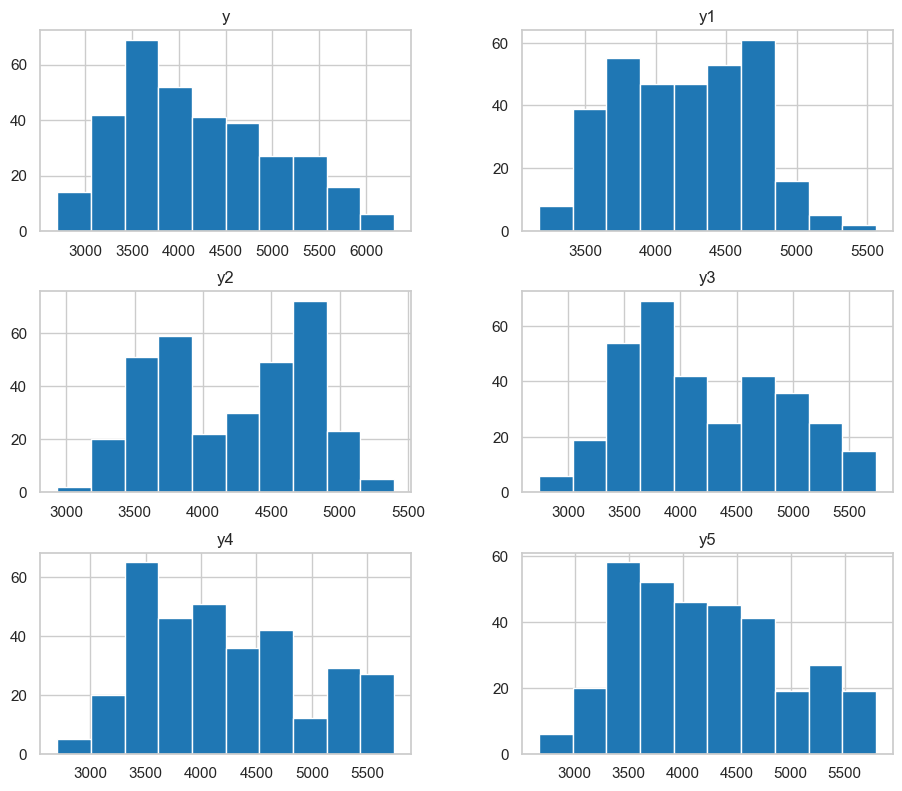

In [196]:
models_results.hist()
plt.show()

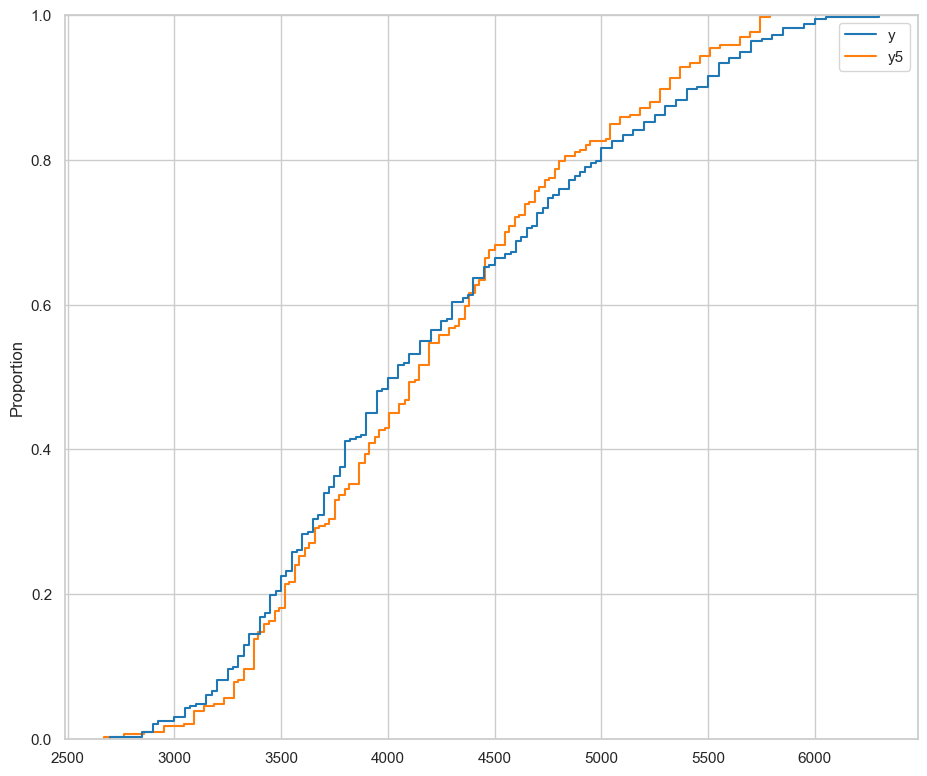

In [197]:
sns.ecdfplot(
    models_results[["y", "y5"]]
)
plt.show()

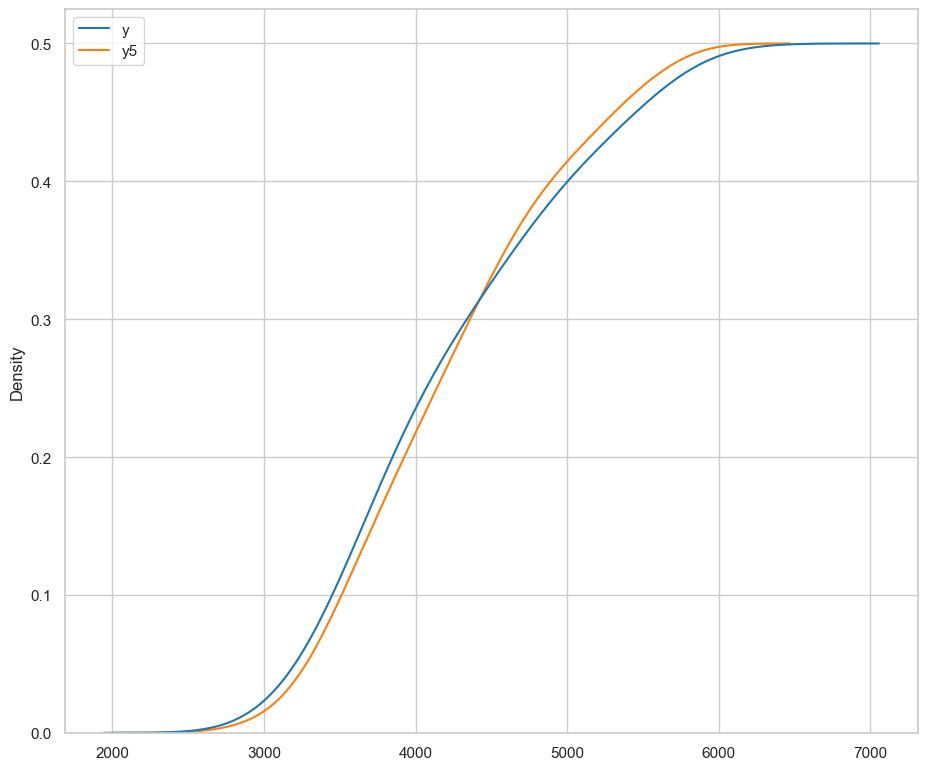

In [198]:
sns.kdeplot(
    models_results[["y", "y5"]],
    cumulative=True
)
plt.show()

Es mejor explorar las relaciones antes de modelar

<Figure size 1000x1000 with 0 Axes>

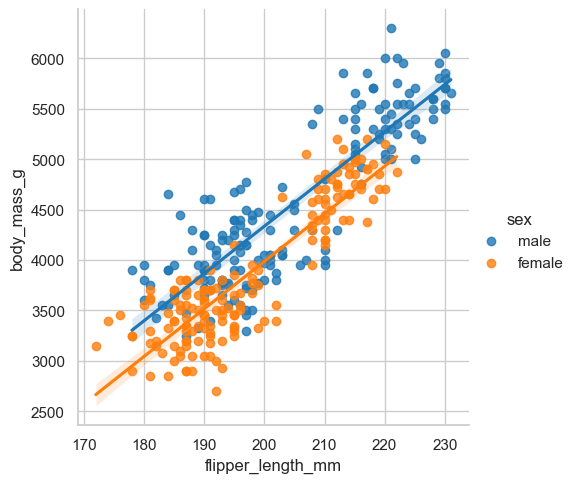

In [199]:
plt.figure(figsize = (10, 10))
sns.lmplot(
    processed_penguins_df,
    x = "flipper_length_mm",
    y = "body_mass_g",
    hue = "sex"
)
plt.show()

<Figure size 1000x1000 with 0 Axes>

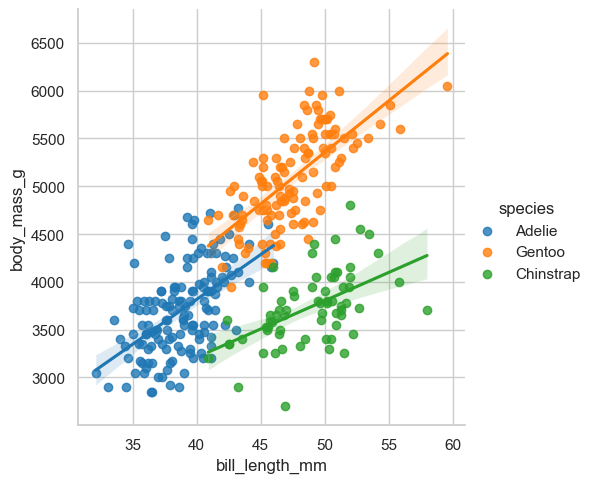

In [200]:
plt.figure(figsize = (10, 10))
sns.lmplot(
    processed_penguins_df,
    x = "bill_length_mm",
    y = "body_mass_g",
    hue = "species"
)
plt.show()

#### Regresión logística

Es más usado para variables categóricas

coeffs: En los casos de regresión representan la tasa de cambio de de “log odss” respecto de alguna variable independiente en específico (bill_length_mm, island, etc.). Creo que no es responsable establecer de forma concreta si un coeficiente es “importante” si no se considera el rango numérico de la varibable independiente en cuestión, pero en general uno podría decir que mientras más lejos de cero el coeficiente, más efecto tiene una variable en específico.

P>|z| es el p-value que establece si un coeff es estadisticamente significativo en el modelo. Si p-value < alpha (0< alpha <1, elegido bajo nuestro criterio, usualmente 0.05) entonces el coeficiente tiene significancia estadística en el modelo.

LLR p-value: Es el p-value del modelo en general. Si LLR p-value < alpha, entonces nuestro modelo es útil para hacer predicciones.

In [207]:
processed_penguins_df["numeric_sex"] = processed_penguins_df["sex"].replace(["male", "female"], [1, 0])

C:\Users\shani\AppData\Local\Temp\ipykernel_12172\297395058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_penguins_df["numeric_sex"] = processed_penguins_df.copy()["sex"].replace(["male", "female"], [1, 0])


In [208]:
processed_penguins_df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  year  numeric_sex  
0       3750.0    male  2007            1  
1       3800.0  female  2007            0  
2       3250.0  female  2007            0  
4       3450.0  female  2007            0  
5       3650.0    male  2007            1

In [212]:
smf.logit(
    formula = "numeric_sex ~ flipper_length_mm + bill_length_mm + bill_depth_mm + island",
    data = processed_penguins_df
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Tue, 19 Dec 2023   Pseudo R-squ.:                  0.4793
Time:                        10:08:33   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -61.4464      6.944     -8.849      0.000     -75.057     -47.836
island[T.Dream]        -1.5596      0.493     -3.163      0.002      -2.526      -0.593
island[T.Torgersen]    -1.0323      0.599     -1.725      0.085      -2.205       0.141
flipper_length_mm       0.1393      0.024      5.874      0.000       0.093       0.186
bill_length_mm          0.1413      0.045      3.150      0.002       0.053       0.229
bill_depth_mm           1.6401      0.185      8.864      0.000       1.277       2.003
=======================================================================================
"""

##### Explorando varibles

In [217]:
(
    processed_penguins_df
    .value_counts(["island", "sex"])
    .reset_index(name="count")
)

island     sex  count
0     Biscoe    male     83
1     Biscoe  female     80
2      Dream    male     62
3      Dream  female     61
4  Torgersen  female     24
5  Torgersen    male     23

#### Determinar especie

In [218]:
processed_penguins_df["species"].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [219]:
processed_penguins_df = (
    processed_penguins_df
    .assign(is_adelie = lambda df:df["species"].replace(['Adelie', 'Gentoo', 'Chinstrap'], [1, 0, 0]))
)

In [220]:
model_is_adelie = smf.logit(
    formula = "is_adelie ~ flipper_length_mm + sex",
    data = processed_penguins_df
).fit()

Optimization terminated successfully.
         Current function value: 0.355225
         Iterations 8


In [221]:
model_is_adelie.params

Intercept            40.568368
sex[T.male]           1.282656
flipper_length_mm    -0.209705
dtype: float64

In [236]:
adelie_predictions = pd.DataFrame(
    dict(
        y = processed_penguins_df["is_adelie"],
        y_pred = model_is_adelie.predict().round().astype(int)
    )
)
adelie_predictions.head()

y  y_pred
0  1       1
1  1       1
2  1       0
4  1       1
5  1       1

In [238]:
(
    adelie_predictions
    .value_counts(["y", "y_pred"])
    .reset_index(name="count")
)

y  y_pred  count
0  0       0    151
1  1       1    129
2  0       1     36
3  1       0     17

In [239]:
metrics.confusion_matrix(adelie_predictions["y"],
                         adelie_predictions["y_pred"])

array([[151,  36],
       [ 17, 129]], dtype=int64)

In [241]:
metrics.accuracy_score(adelie_predictions["y"],
                       adelie_predictions["y_pred"])

0.8408408408408409

#### Paradoja de Simpson
Concluir multiples cosas de los mismos datos

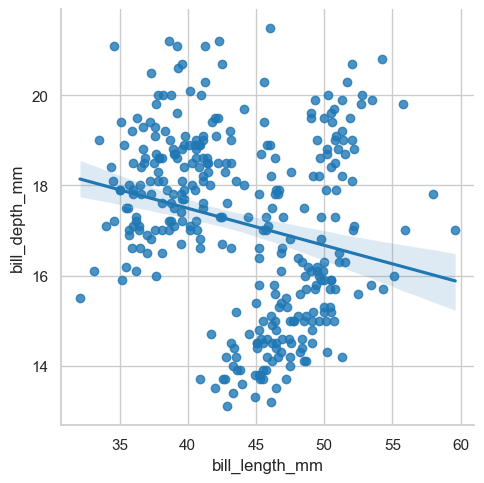

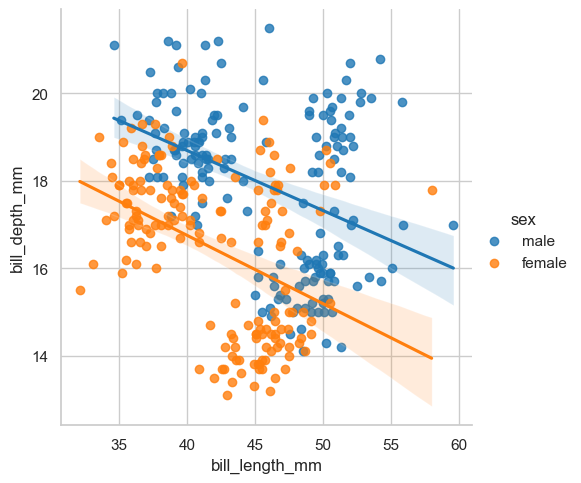

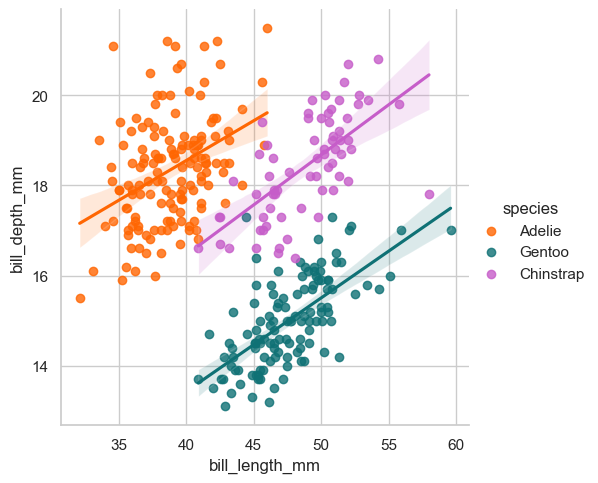

In [246]:
# fig, ax = plt.subplots(1, 2)
sns.lmplot(
    processed_penguins_df,
    x="bill_length_mm",
    y="bill_depth_mm"
)
sns.lmplot(
    processed_penguins_df,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="sex"
)
sns.lmplot(
    processed_penguins_df,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    palette=penguin_color
)
plt.show()

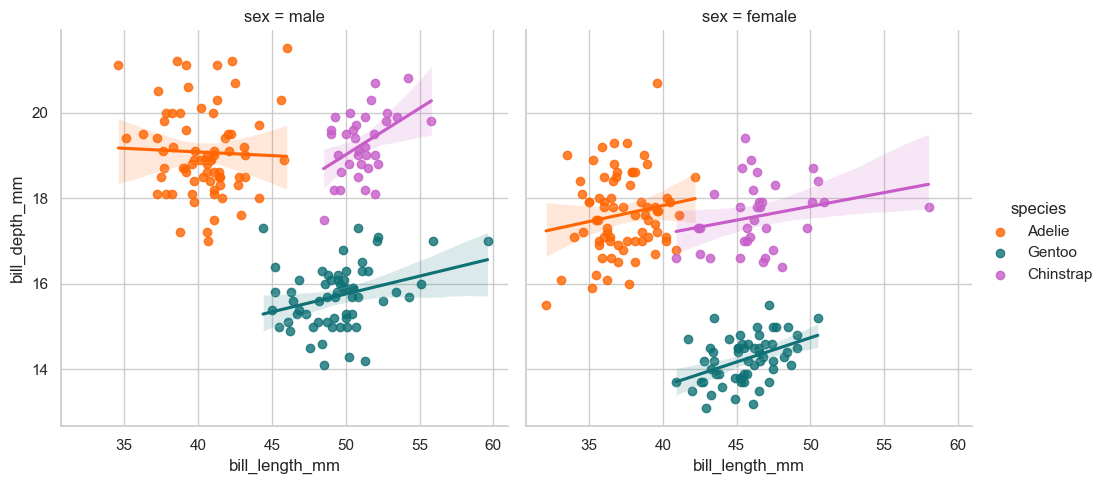

In [251]:
sns.lmplot(
    processed_penguins_df,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    col="sex",
    palette=penguin_color
)

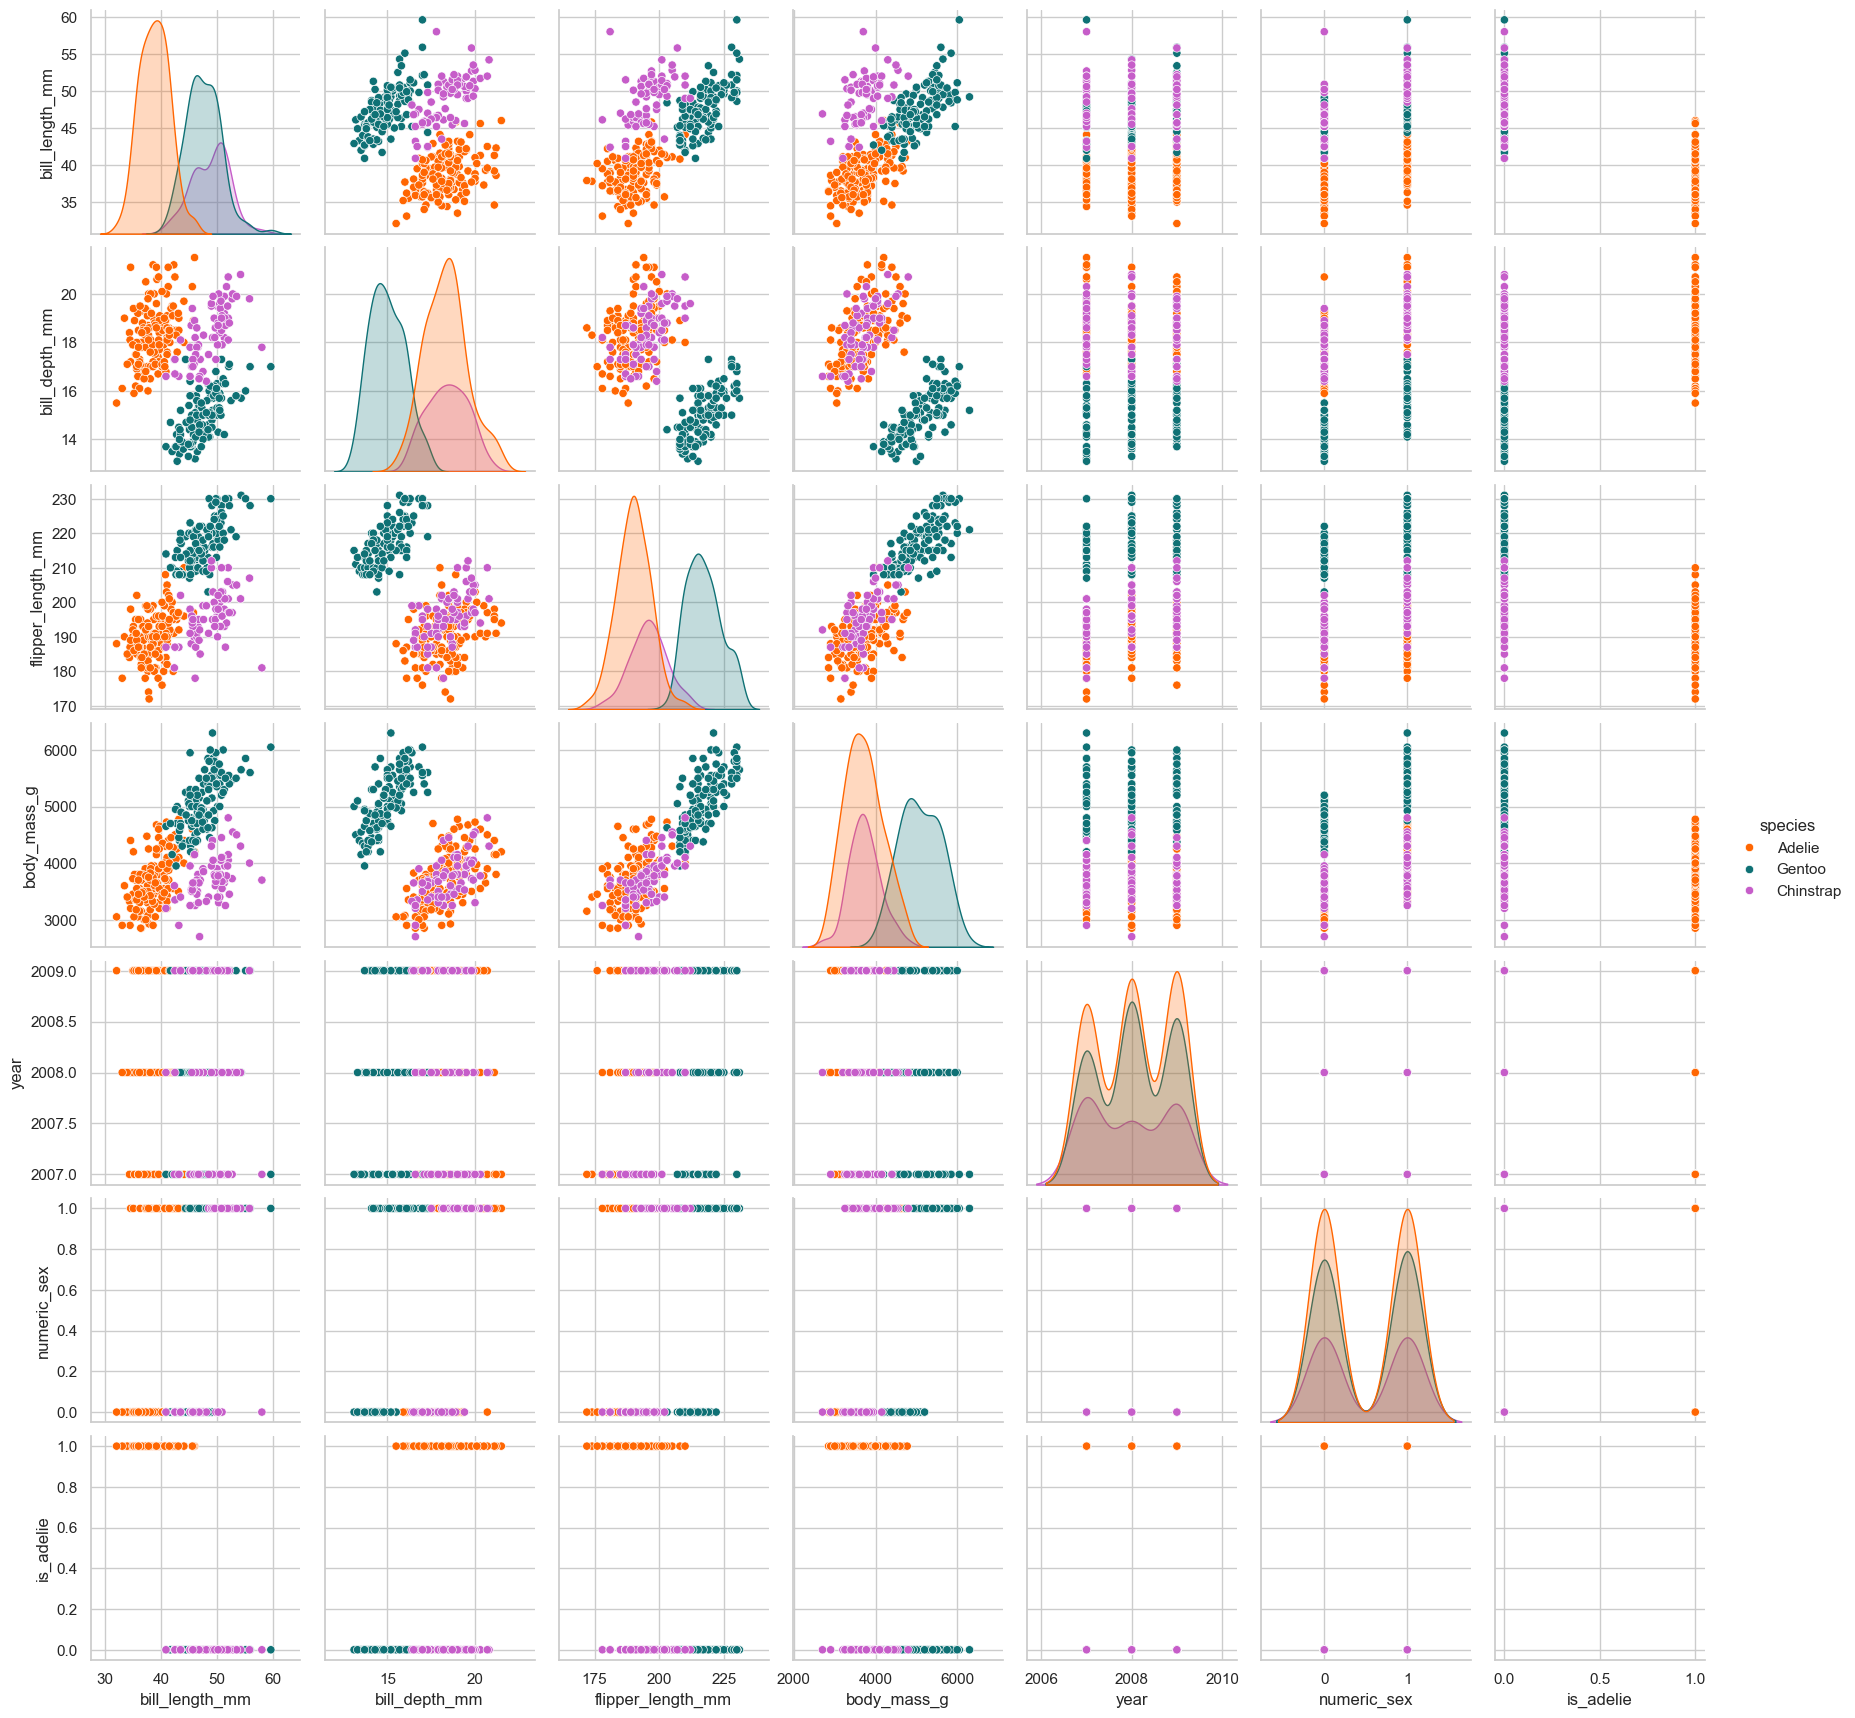

In [255]:
sns.pairplot(
    processed_penguins_df,
    hue="species",
    palette=penguin_color
    )
plt.show()

In [261]:
import palmerpenguins
import pandas as pd
import ydata_profiling as prof

df = palmerpenguins.load_penguins()

prof.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]